In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Exploring Speaker data

In [2]:
speaker_df = pd.read_csv('df_speakers.csv')
print('Number of rows in data frame : ',len(speaker_df))
print('Number of speakers : ', len(speaker_df['id'].unique()))
print('Number of dialogues : ',len(speaker_df['dialogue_id'].unique()))
speaker_df.head()

Number of rows in data frame :  3593
Number of speakers :  667
Number of dialogues :  1251


id exactage age1994 agerange gender                  nat  birthplace  \
0  S0021     27.0   25_34    19_29      F              British     Swindon   
1  S0032     28.0   25_34    19_29      M              British      Yoevil   
2  S0094     33.0   25_34    30_39      F              British     Swindon   
3  S0095     33.0   25_34    30_39      M              British   Camarthen   
4  S0261     41.0   35_44    40_49      M  British/New Zealand  Wellington   

  birthcountry       l1    lingorig  ... dialect_l4      edqual  \
0      England  English     England  ...  southwest  5_postgrad   
1      England  English     England  ...  southwest  4_graduate   
2      England  English     England  ...  southwest  5_postgrad   
3     Scotland  English     England  ...      wales  5_postgrad   
4  New Zealand  English  England/NZ  ...     non_uk  4_graduate   

            occupation socgrade  nssec      l2                fls in_core  \
0              Teacher        B      2     NaN                NaN       y   
1   Software developer        A    1_2     NaN                NaN       y   
2          PhD student        A    1_2  German  Welsh -- Beginner       y   
3  Self employed maker        E  uncat     NaN                NaN       y   
4         Entrepreneur        A    1_2     NaN                NaN       n   

  dialogue_id num_of_speakers  
0        S23A               4  
1        S23A               4  
2        S23A               4  
3        S23A               4  
4        S24A               2  

[5 rows x 27 columns]

In [3]:
speaker_df['exactage'] = speaker_df['exactage'].apply(lambda x: '65' if x=='60s' else x)
speaker_df['exactage']=speaker_df['exactage'].astype(float)
speaker_df.dtypes

id                  object
exactage           float64
age1994             object
agerange            object
gender              object
nat                 object
birthplace          object
birthcountry        object
l1                  object
lingorig            object
dialect_rep         object
hab_city            object
hab_country         object
hab_dur             object
dialect_l1          object
dialect_l2          object
dialect_l3          object
dialect_l4          object
edqual              object
occupation          object
socgrade            object
nssec               object
l2                  object
fls                 object
in_core             object
dialogue_id         object
num_of_speakers      int64
dtype: object

In [4]:
speaker_df.describe()

exactage  num_of_speakers
count  3237.000000      3593.000000
mean     37.637010         3.332869
std      19.616569         1.458777
min       2.000000         2.000000
25%      21.000000         2.000000
50%      36.000000         3.000000
75%      53.000000         4.000000
max      91.000000        12.000000

## checking the speaker count per dialogue

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\3992908550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=speaker_dist.index, y=speaker_dist.values, palette="muted")


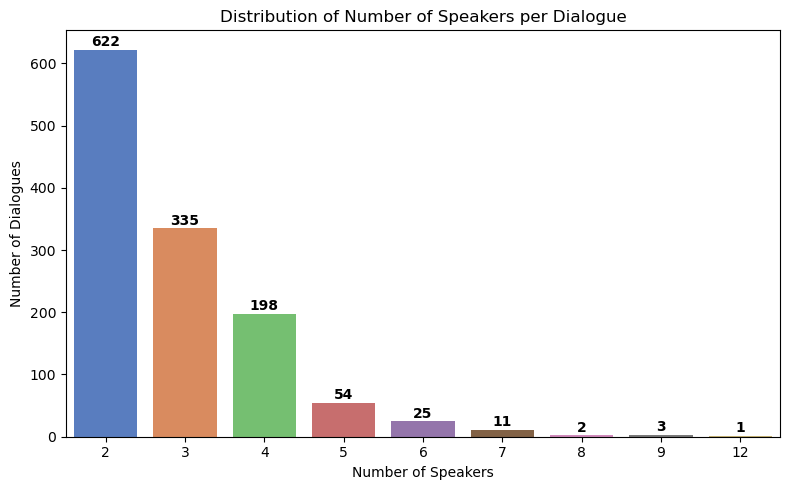

In [ ]:
speaker_counts = speaker_df[['dialogue_id', 'num_of_speakers']].drop_duplicates()
speaker_dist = speaker_counts['num_of_speakers'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=speaker_dist.index, y=speaker_dist.values, palette="muted")
plt.title("Distribution of Number of Speakers per Dialogue")
plt.xlabel("Number of Speakers")
plt.ylabel("Number of Dialogues")

for i, value in enumerate(speaker_dist.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## agerage counts

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\3662154893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=speaker_df, x='agerange', order=sorted(speaker_df['agerange'].dropna().unique()), palette="pastel")


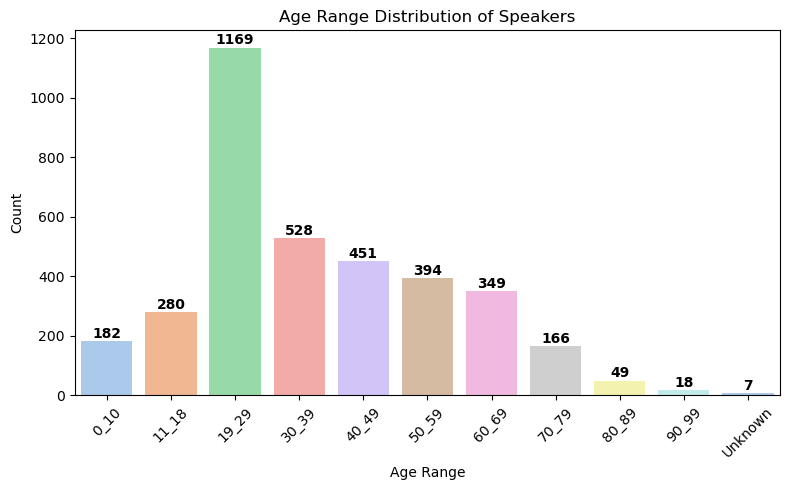

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=speaker_df, x='agerange', order=sorted(speaker_df['agerange'].dropna().unique()), palette="pastel")
plt.title("Age Range Distribution of Speakers")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}', ha="center", va="bottom", fontweight='bold')

plt.tight_layout()
plt.show()

### gender distribution

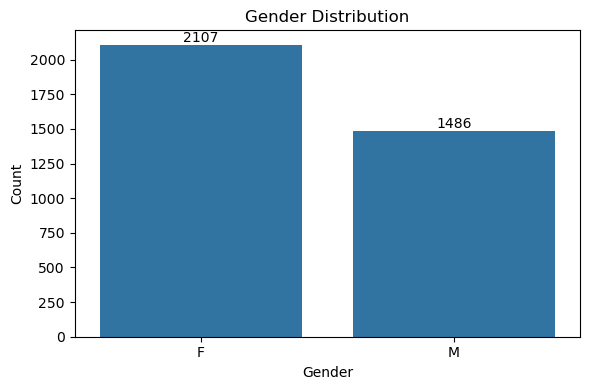

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=speaker_df, x='gender', order=speaker_df['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### linguistic origin variation

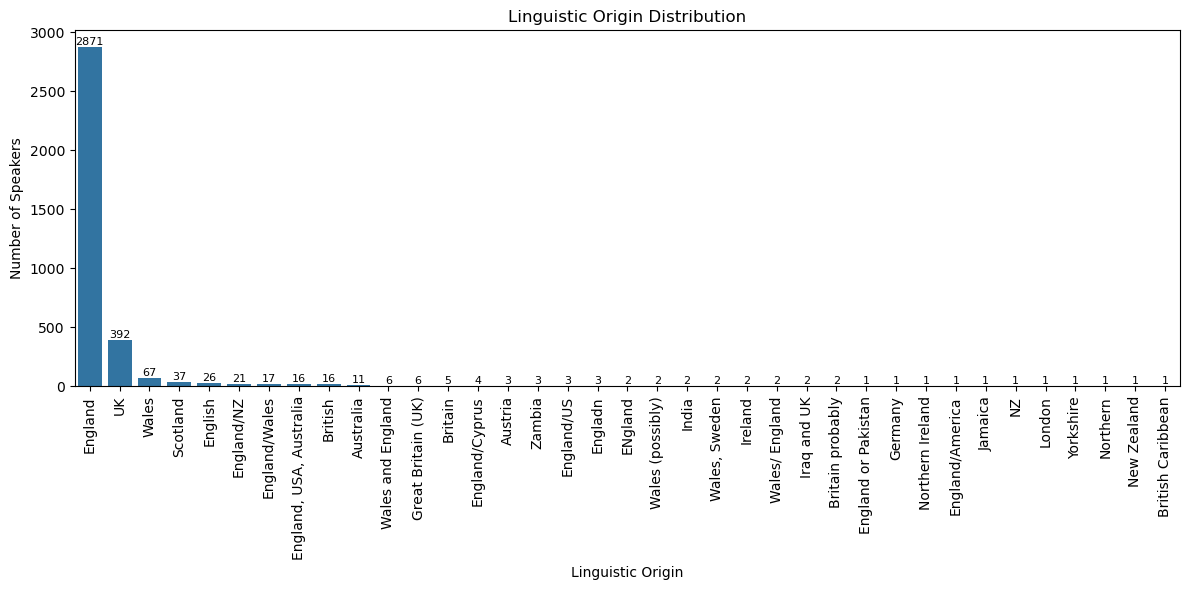

In [ ]:
nat_counts = speaker_df['lingorig'].value_counts()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=nat_counts.index, y=nat_counts.values)
plt.title('Linguistic Origin Distribution')
plt.xlabel('Linguistic Origin')
plt.ylabel('Number of Speakers')
plt.xticks(rotation=90)

for i, count in enumerate(nat_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# Exploring Utterance data

In [9]:
df_utts = pd.read_csv('df_utts_2.csv')
df_utts['u_lower'] = df_utts['u'].str.lower()

#filter out empty rows
df_utts = df_utts[df_utts['u'].notna()]

#count swear words and filler words - mostly sounds 
swear_words = ['fuck','shit','bloddy','piss','crap','arse','bitch','dick','bugger','bastard','bollock','cunt','twat','shag','wank','cock']
filler_words = ['er','erm','uh','ugh','ah','aah','eee','eeeee','oh','em','mmm','mm','hmm','hm','um','umm','eh']

def count_words(text, word_list):
    tokens = text.split()
    return sum(1 for token in tokens if token in word_list)

df_utts['utt_len'] = df_utts['u_lower'].str.split().apply(len)
df_utts['swear_count'] = df_utts['u_lower'].apply(lambda x: count_words(x, swear_words))
df_utts['filler_count'] = df_utts['u_lower'].apply(lambda x: count_words(x, filler_words))

max_utts_per_dialogue = df_utts.groupby('dialogue_id')['n'].max().rename('num_of_utts')
df_utts = df_utts.merge(max_utts_per_dialogue, on='dialogue_id', how='left')

utt_count_per_speaker = (
    df_utts.groupby(['dialogue_id', 'who'])
    .size()
    .rename('utt_count_per_speaker')
    .reset_index()
)

df_utts = df_utts.merge(utt_count_per_speaker, on=['dialogue_id', 'who'], how='left')

df_utts.head()

n    who                                                  u dialogue_id  \
0  1  S0094                                              words        S23A   
1  2  S0095     it's a games word? like a computer games word?        S23A   
2  3  S0032                                          yeah yeah        S23A   
3  4  S0095                                  oh oh that's nice        S23A   
4  5  S0032  I it's something I have really heard z-buffer ...        S23A   

                                             u_lower  utt_len  swear_count  \
0                                              words        1            0   
1     it's a games word? like a computer games word?        9            0   
2                                          yeah yeah        2            0   
3                                  oh oh that's nice        4            0   
4  i it's something i have really heard z-buffer ...       13            0   

   filler_count  num_of_utts  utt_count_per_speaker  
0             0         4038                   1035  
1             0         4038                    423  
2             0         4038                    872  
3             2         4038                    423  
4             0         4038                    872

In [10]:
# total words of dialogue
total_words_dialogue = df_utts.groupby('dialogue_id')['utt_len'].sum().rename('total_words_dialogue')
df_utts = df_utts.merge(total_words_dialogue, on='dialogue_id', how='left')

# total words per speaker
total_words_speaker = (
    df_utts.groupby(['dialogue_id', 'who'])['utt_len']
    .sum()
    .rename('total_words_speaker')
    .reset_index()
)
df_utts = df_utts.merge(total_words_speaker, on=['dialogue_id', 'who'], how='left')

# unique words per dialogue
df_utts['tokens'] = df_utts['u_lower'].str.split()

unique_words_dialogue = (
    df_utts.groupby('dialogue_id')['tokens']
    .sum()
    .apply(lambda x: len(set(x)))
    .rename('unique_words_dialogue')
)
df_utts = df_utts.merge(unique_words_dialogue, on='dialogue_id', how='left')

#unique words per speaker
unique_words_speaker = (
    df_utts.groupby(['dialogue_id', 'who'])['tokens']
    .sum()
    .apply(lambda x: len(set(x)))
    .rename('unique_words_speaker')
    .reset_index()
)
df_utts = df_utts.merge(unique_words_speaker, on=['dialogue_id', 'who'], how='left')

In [11]:
df_utts.head(2)

n    who                                               u dialogue_id  \
0  1  S0094                                           words        S23A   
1  2  S0095  it's a games word? like a computer games word?        S23A   

                                          u_lower  utt_len  swear_count  \
0                                           words        1            0   
1  it's a games word? like a computer games word?        9            0   

   filler_count  num_of_utts  utt_count_per_speaker  total_words_dialogue  \
0             0         4038                   1035                 22360   
1             0         4038                    423                 22360   

   total_words_speaker                                             tokens  \
0                 5942                                            [words]   
1                 2442  [it's, a, games, word?, like, a, computer, gam...   

   unique_words_dialogue  unique_words_speaker  
0                   2516                  1118  
1                   2516                   720

In [12]:
df_utts = df_utts[['who', 'dialogue_id', 'utt_len', 'swear_count',
       'filler_count', 'num_of_utts','utt_count_per_speaker', 'total_words_dialogue',
       'total_words_speaker', 'unique_words_dialogue',
       'unique_words_speaker']]

df_speaker_dialogue_df = df_utts.groupby(['dialogue_id', 'who']).agg({
    'utt_len': 'mean',
    'swear_count': 'mean',
    'filler_count': 'mean',
    'num_of_utts': 'first', 
    'utt_count_per_speaker':'first',
    'total_words_dialogue': 'first', 
    'total_words_speaker': 'first', 
    'unique_words_dialogue': 'first', 
    'unique_words_speaker': 'first'
}).reset_index()

df_speaker_dialogue_df = df_speaker_dialogue_df.rename(columns={
    'utt_len': 'avg_utt_len',
    'swear_count': 'avg_swear_count',
    'filler_count': 'avg_filler_count'
})

speaker_info = speaker_df[['id', 'dialogue_id', 'exactage', 'agerange', 'num_of_speakers']]
df_speaker_dialogue_df = df_speaker_dialogue_df.merge(
    speaker_info,
    left_on=['who', 'dialogue_id'],
    right_on=['id', 'dialogue_id'],
    how='left'
).drop(columns=['id'])

df_speaker_dialogue_df = df_speaker_dialogue_df[~df_speaker_dialogue_df['who'].str.startswith('UNK', na=False)]

df_speaker_dialogue_df['unique_word_ratio_overall'] = (
    df_speaker_dialogue_df['unique_words_speaker'] / df_speaker_dialogue_df['total_words_speaker']
)

df_speaker_dialogue_df['unique_word_ratio_per_speaker'] = (
    df_speaker_dialogue_df['unique_words_speaker'] / df_speaker_dialogue_df['unique_words_dialogue']
)
df_speaker_dialogue_df['utt_prop_per_speaker'] = (
    df_speaker_dialogue_df['utt_count_per_speaker'] / df_speaker_dialogue_df['num_of_utts']
)

df_speaker_dialogue_df.head()

dialogue_id    who  avg_utt_len  avg_swear_count  avg_filler_count  \
0        S23A  S0021     7.123928         0.002860          0.397521   
1        S23A  S0032     7.158257         0.000000          0.175459   
2        S23A  S0094     5.741063         0.001932          0.365217   
3        S23A  S0095     5.773050         0.009456          0.193853   
6        S24A  S0261    14.564516         0.000000          0.693548   

   num_of_utts  utt_count_per_speaker  total_words_dialogue  \
0         4038                   1049                 22360   
1         4038                    872                 22360   
2         4038                   1035                 22360   
3         4038                    423                 22360   
6          127                     62                  1629   

   total_words_speaker  unique_words_dialogue  unique_words_speaker  exactage  \
0                 7473                   2516                  1242      27.0   
1                 6242                   2516                  1272      28.0   
2                 5942                   2516                  1118      33.0   
3                 2442                   2516                   720      33.0   
6                  903                    438                   319      41.0   

  agerange  num_of_speakers  unique_word_ratio_overall  \
0    19_29              4.0                   0.166198   
1    19_29              4.0                   0.203781   
2    30_39              4.0                   0.188152   
3    30_39              4.0                   0.294840   
6    40_49              2.0                   0.353267   

   unique_word_ratio_per_speaker  utt_prop_per_speaker  
0                       0.493641              0.259782  
1                       0.505564              0.215948  
2                       0.444356              0.256315  
3                       0.286169              0.104755  
6                       0.728311              0.488189

In [13]:
df_speaker_dialogue_df.describe()

avg_utt_len  avg_swear_count  avg_filler_count   num_of_utts  \
count  3592.000000      3592.000000       3592.000000   3592.000000   
mean      8.824234         0.005709          0.269880   1117.111637   
std       4.212348         0.013034          0.181493   1074.396373   
min       1.000000         0.000000          0.000000     66.000000   
25%       6.239568         0.000000          0.167303    457.000000   
50%       8.035259         0.000000          0.234347    799.500000   
75%      10.386759         0.005121          0.327237   1475.000000   
max      84.384615         0.166667          3.846154  16574.000000   

       utt_count_per_speaker  total_words_dialogue  total_words_speaker  \
count            3592.000000           3592.000000          3592.000000   
mean              325.209354           8719.266147          2856.642539   
std               309.281811           7532.019566          2823.358652   
min                 1.000000            738.000000             1.000000   
25%               130.000000           3848.000000          1010.750000   
50%               236.000000           6611.000000          2023.500000   
75%               424.000000          11453.500000          3767.500000   
max              4496.000000         115269.000000         40211.000000   

       unique_words_dialogue  unique_words_speaker     exactage  \
count            3592.000000           3592.000000  3235.000000   
mean             1246.564031            612.118875    37.633694   
std               618.456952            370.574524    19.595673   
min               262.000000              1.000000     2.000000   
25%               790.000000            349.000000    21.000000   
50%              1134.500000            542.500000    36.000000   
75%              1597.000000            809.000000    53.000000   
max              6886.000000           4143.000000    91.000000   

       num_of_speakers  unique_word_ratio_overall  \
count      3591.000000                3592.000000   
mean          3.330549                   0.295657   
std           1.451983                   0.124063   
min           2.000000                   0.076993   
25%           2.000000                   0.213635   
50%           3.000000                   0.267522   
75%           4.000000                   0.345698   
max          12.000000                   1.000000   

       unique_word_ratio_per_speaker  utt_prop_per_speaker  
count                    3592.000000           3592.000000  
mean                        0.502605              0.328800  
std                         0.194312              0.146173  
min                         0.001120              0.000638  
25%                         0.360788              0.213108  
50%                         0.529013              0.342078  
75%                         0.654451              0.476862  
max                         0.951482              0.532020

In [14]:
df_speaker_dialogue_df.head(1)

dialogue_id    who  avg_utt_len  avg_swear_count  avg_filler_count  \
0        S23A  S0021     7.123928          0.00286          0.397521   

   num_of_utts  utt_count_per_speaker  total_words_dialogue  \
0         4038                   1049                 22360   

   total_words_speaker  unique_words_dialogue  unique_words_speaker  exactage  \
0                 7473                   2516                  1242      27.0   

  agerange  num_of_speakers  unique_word_ratio_overall  \
0    19_29              4.0                   0.166198   

   unique_word_ratio_per_speaker  utt_prop_per_speaker  
0                       0.493641              0.259782

### Age Vs  overall and speaker wise unique word ratio (avg)

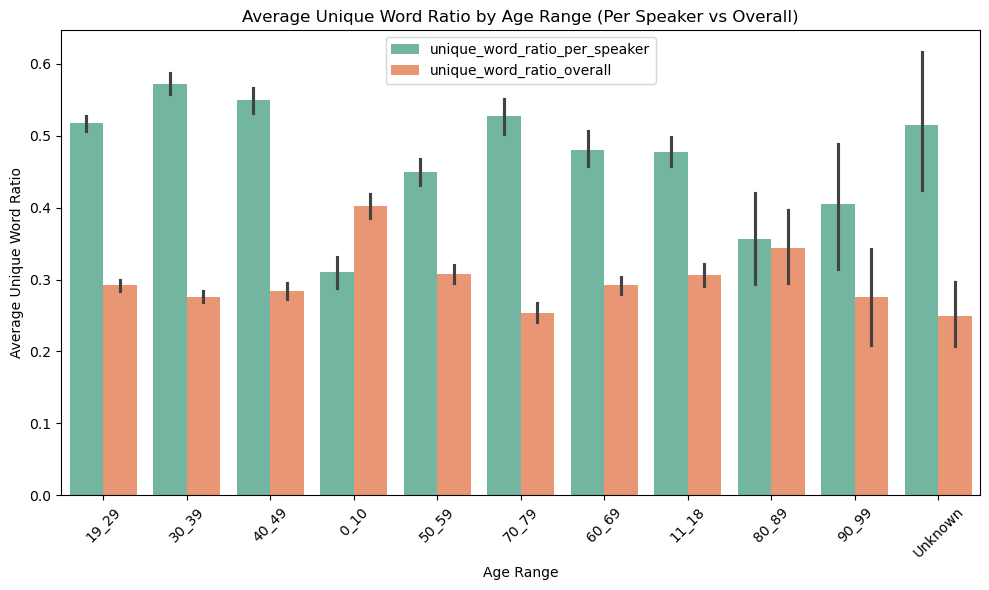

In [15]:
plot_df = df_speaker_dialogue_df[['agerange', 'unique_word_ratio_per_speaker', 'unique_word_ratio_overall']].melt(
    id_vars='agerange',
    var_name='Ratio_Type',
    value_name='Unique_Word_Ratio'
)
plt.figure(figsize=(10,6))
sns.barplot(
    data=plot_df,
    x='agerange',
    y='Unique_Word_Ratio',
    hue='Ratio_Type',
    estimator='mean',
    palette='Set2'
)
plt.title('Average Unique Word Ratio by Age Range (Per Speaker vs Overall)')
plt.ylabel('Average Unique Word Ratio')
plt.xlabel('Age Range')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

groups = df_speaker_dialogue_df.dropna(subset=['agerange', 'unique_word_ratio_per_speaker'])
grouped_data = [
    group['unique_word_ratio_per_speaker'].values
    for _, group in groups.groupby('agerange')
    if len(group) >= 2 
]

f_stat, p_val = f_oneway(*grouped_data)

print(f"ANOVA results for unique_word_ratio_per_speaker and age: F = {f_stat:.3f}, p = {p_val:.4f}")

groups = df_speaker_dialogue_df.dropna(subset=['agerange', 'unique_word_ratio_overall'])
grouped_data = [
    group['unique_word_ratio_overall'].values
    for _, group in groups.groupby('agerange')
    if len(group) >= 2 
]


f_stat, p_val = f_oneway(*grouped_data)

print(f"ANOVA results for unique_word_ratio_overall and age: F = {f_stat:.3f}, p = {p_val:.4f}")

ANOVA results for unique_word_ratio_per_speaker and age: F = 38.859, p = 0.0000
ANOVA results for unique_word_ratio_overall and age: F = 19.502, p = 0.0000


### Unique WOrd Proportion vs. Number of Speakers

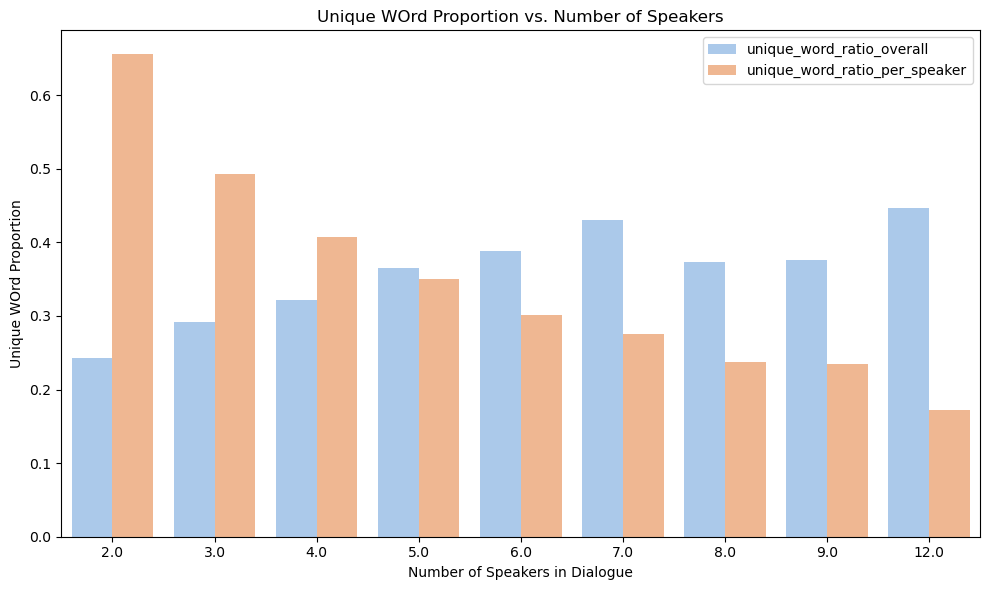

In [17]:
agg_lexical = df_speaker_dialogue_df.groupby('num_of_speakers').agg({
    'unique_word_ratio_overall': 'mean',
    'unique_word_ratio_per_speaker': 'mean'
}).reset_index()

plot_lexical = agg_lexical.melt(
    id_vars='num_of_speakers',
    value_vars=['unique_word_ratio_overall', 'unique_word_ratio_per_speaker'],
    var_name='Lexical_Metric',
    value_name='Average TTR'
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=plot_lexical,
    x='num_of_speakers',
    y='Average TTR',
    hue='Lexical_Metric',
    palette='pastel'
)
plt.title('Unique WOrd Proportion vs. Number of Speakers')
plt.xlabel('Number of Speakers in Dialogue')
plt.ylabel('Unique WOrd Proportion')
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
grouped_overall = [
    group['unique_word_ratio_overall'].dropna().values
    for _, group in df_speaker_dialogue_df.groupby('num_of_speakers')
]

grouped_per_speaker = [
    group['unique_word_ratio_per_speaker'].dropna().values
    for _, group in df_speaker_dialogue_df.groupby('num_of_speakers')
]

# Perform ANOVA for overall ratio
f_overall, p_overall = f_oneway(*grouped_overall)
print(f"ANOVA for unique_word_ratio_overall by num_of_speakers: F = {f_overall:.3f}, p = {p_overall:.4f}")

# Perform ANOVA for per speaker ratio
f_per_speaker, p_per_speaker = f_oneway(*grouped_per_speaker)
print(f"ANOVA for unique_word_ratio_per_speaker by num_of_speakers: F = {f_per_speaker:.3f}, p = {p_per_speaker:.4f}")

ANOVA for unique_word_ratio_overall by num_of_speakers: F = 81.354, p = 0.0000
ANOVA for unique_word_ratio_per_speaker by num_of_speakers: F = 323.747, p = 0.0000


### average swear and filler words per speaker in age categories

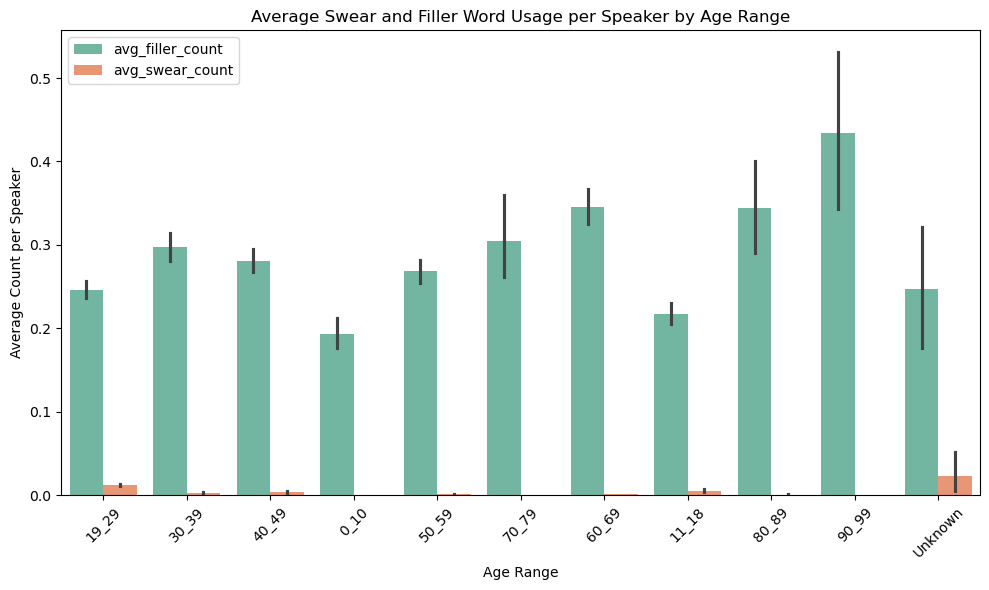

In [19]:
plot_df = df_speaker_dialogue_df.melt(
    id_vars='agerange',
    value_vars=['avg_filler_count', 'avg_swear_count'],
    var_name='Word_Type',
    value_name='Average Count'
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=plot_df,
    x='agerange',
    y='Average Count',
    hue='Word_Type',
    palette='Set2'
)
plt.title('Average Swear and Filler Word Usage per Speaker by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Count per Speaker')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
swear_groups = [
    group['avg_swear_count'].dropna().values
    for _, group in df_speaker_dialogue_df.groupby('agerange')
]

f_swear, p_swear = f_oneway(*swear_groups)
print(f"ANOVA for avg_swear_count by age range: F = {f_swear:.3f}, p = {p_swear:.4f}")

# Filler word ANOVA
filler_groups = [
    group['avg_filler_count'].dropna().values
    for _, group in df_speaker_dialogue_df.groupby('agerange')
]

f_filler, p_filler = f_oneway(*filler_groups)
print(f"ANOVA for avg_filler_count by age range: F = {f_filler:.3f}, p = {p_filler:.4f}")


ANOVA for avg_swear_count by age range: F = 59.839, p = 0.0000
ANOVA for avg_filler_count by age range: F = 18.806, p = 0.0000


### Speaker Turn Dominance vs. Dialogue Size

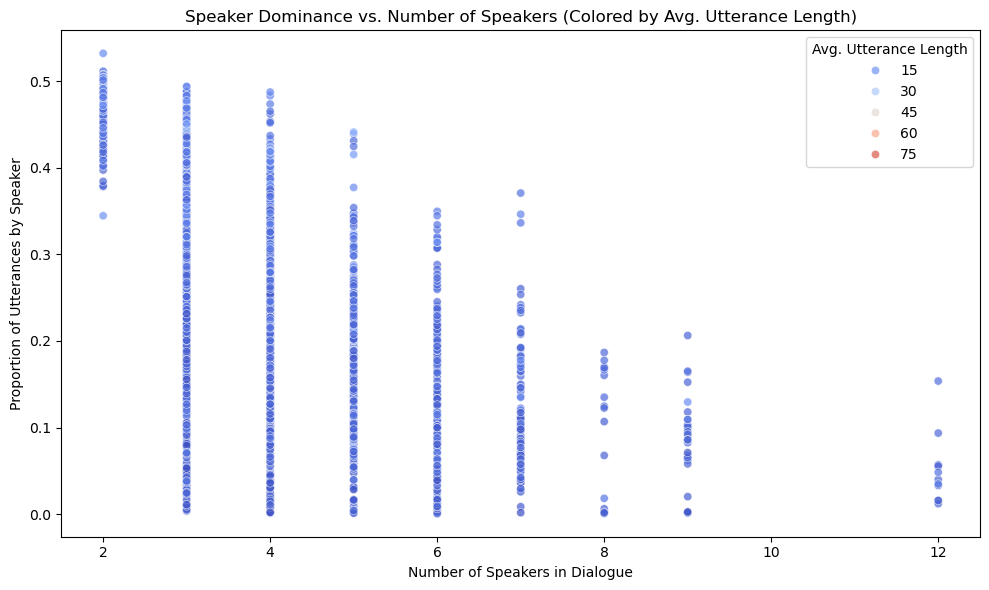

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_speaker_dialogue_df, 
    x='num_of_speakers', 
    y='utt_prop_per_speaker', 
    hue='avg_utt_len', 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Speaker Dominance vs. Number of Speakers (Colored by Avg. Utterance Length)')
plt.xlabel('Number of Speakers in Dialogue')
plt.ylabel('Proportion of Utterances by Speaker')
plt.legend(title='Avg. Utterance Length')
plt.tight_layout()
plt.show()

In [22]:
df_speaker_dialogue_df.head(1)

dialogue_id    who  avg_utt_len  avg_swear_count  avg_filler_count  \
0        S23A  S0021     7.123928          0.00286          0.397521   

   num_of_utts  utt_count_per_speaker  total_words_dialogue  \
0         4038                   1049                 22360   

   total_words_speaker  unique_words_dialogue  unique_words_speaker  exactage  \
0                 7473                   2516                  1242      27.0   

  agerange  num_of_speakers  unique_word_ratio_overall  \
0    19_29              4.0                   0.166198   

   unique_word_ratio_per_speaker  utt_prop_per_speaker  
0                       0.493641              0.259782

## separating age categories ino young and old. old is considered as 50+ and young is considered as 20-29. 

based on the following filtering criteria,

- age ranges falls into old and young age categories
- 2 speaker dialogues

In [23]:
age_ranges = ['19_29','50_59','60_69','70_79','80_89','90_99']
data_speaker_df = df_speaker_dialogue_df[(df_speaker_dialogue_df['num_of_speakers']==2) & (df_speaker_dialogue_df['agerange'].isin(age_ranges))]

def young_old(x):
    if(x=='19_29'):
        return 'young'
    else:
        return 'old'
    
data_speaker_df['age_cat'] = data_speaker_df['agerange'].apply(lambda x: young_old(x))

#filter out dialogues where only one participant falls into the respective age groups
dialogue_counts = data_speaker_df.groupby('dialogue_id')['who'].nunique()
valid_dialogues = dialogue_counts[dialogue_counts == 2].index
data_speaker_df = data_speaker_df[data_speaker_df['dialogue_id'].isin(valid_dialogues)]
#data_speaker_df.to_csv('data_speaker_df.csv',index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\2504141029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_speaker_df['age_cat'] = data_speaker_df['agerange'].apply(lambda x: young_old(x))


In [24]:
data_speaker_df.head()

dialogue_id    who  avg_utt_len  avg_swear_count  avg_filler_count  \
31        S29X  S0486     7.061728         0.000000          0.296296   
32        S29X  S0642     8.545455         0.000000          0.230303   
36        S2AJ  S0439    11.909091         0.019481          0.214286   
37        S2AJ  S0441    12.418750         0.050000          0.312500   
42        S2C9  S0336    14.593296         0.015642          0.279330   

    num_of_utts  utt_count_per_speaker  total_words_dialogue  \
31          330                    162                  2559   
32          330                    165                  2559   
36          328                    154                  3821   
37          328                    160                  3821   
42         1836                    895                 23169   

    total_words_speaker  unique_words_dialogue  unique_words_speaker  \
31                 1144                    617                   341   
32                 1410                    617                   453   
36                 1834                    712                   488   
37                 1987                    712                   460   
42                13061                   1998                  1427   

    exactage agerange  num_of_speakers  unique_word_ratio_overall  \
31      65.0    60_69              2.0                   0.298077   
32      71.0    70_79              2.0                   0.321277   
36      23.0    19_29              2.0                   0.266085   
37      24.0    19_29              2.0                   0.231505   
42      24.0    19_29              2.0                   0.109257   

    unique_word_ratio_per_speaker  utt_prop_per_speaker age_cat  
31                       0.552674              0.490909     old  
32                       0.734198              0.500000     old  
36                       0.685393              0.469512   young  
37                       0.646067              0.487805   young  
42                       0.714214              0.487473   young

In [25]:
# defining dialogue category based on old and young
data_speaker_df['dialogue_cat'] = ''
for id, group in data_speaker_df.groupby('dialogue_id'):
    ages = group['age_cat'].unique()
    if len(ages) == 1:
        cat = ages[0]+'-'+ages[0]
    else:
        # Sort to avoid random order (e.g., 'young-old' vs 'old-young')
        sorted_ages = sorted(ages)
        cat = f'{sorted_ages[0]}-{sorted_ages[1]}'
    data_speaker_df.loc[group.index, 'dialogue_cat'] = cat

#data_speaker_df.to_csv('data_speaker_df.csv',index=False)
data_speaker_df.head(2)

dialogue_id    who  avg_utt_len  avg_swear_count  avg_filler_count  \
31        S29X  S0486     7.061728              0.0          0.296296   
32        S29X  S0642     8.545455              0.0          0.230303   

    num_of_utts  utt_count_per_speaker  total_words_dialogue  \
31          330                    162                  2559   
32          330                    165                  2559   

    total_words_speaker  unique_words_dialogue  unique_words_speaker  \
31                 1144                    617                   341   
32                 1410                    617                   453   

    exactage agerange  num_of_speakers  unique_word_ratio_overall  \
31      65.0    60_69              2.0                   0.298077   
32      71.0    70_79              2.0                   0.321277   

    unique_word_ratio_per_speaker  utt_prop_per_speaker age_cat dialogue_cat  
31                       0.552674              0.490909     old      old-old  
32                       0.734198              0.500000     old      old-old

In [26]:
data_speaker_df.to_csv('data_speaker_df_new.csv',index=False)

### ploting to see how many dialogues are thesre with relevant age categories

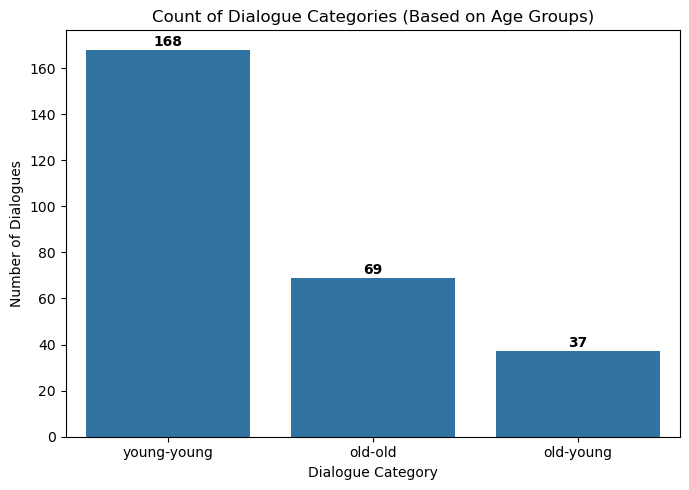

In [ ]:
unique_dialogues = data_speaker_df.drop_duplicates(subset='dialogue_id')
dialogue_cat_counts = unique_dialogues['dialogue_cat'].value_counts()

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=dialogue_cat_counts.index, y=dialogue_cat_counts.values)
plt.title("Count of Dialogue Categories (Based on Age Groups)")
plt.xlabel("Dialogue Category")
plt.ylabel("Number of Dialogues")

for i, value in enumerate(dialogue_cat_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

##### observing uttarence length varions for age groups

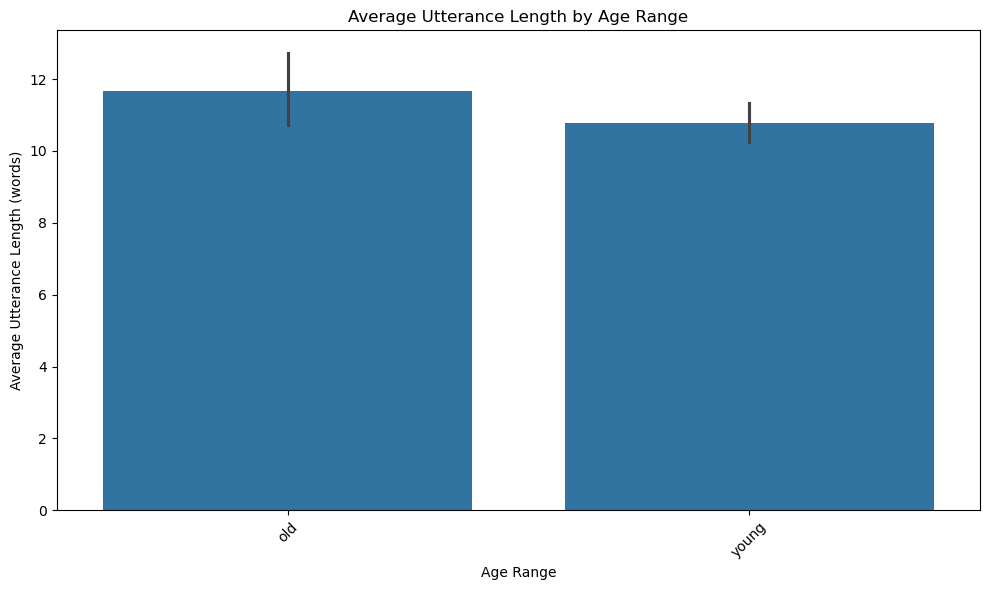

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=data_speaker_df,
    x='age_cat',
    y='avg_utt_len',
    estimator='mean'
)

plt.title('Average Utterance Length by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Utterance Length (words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

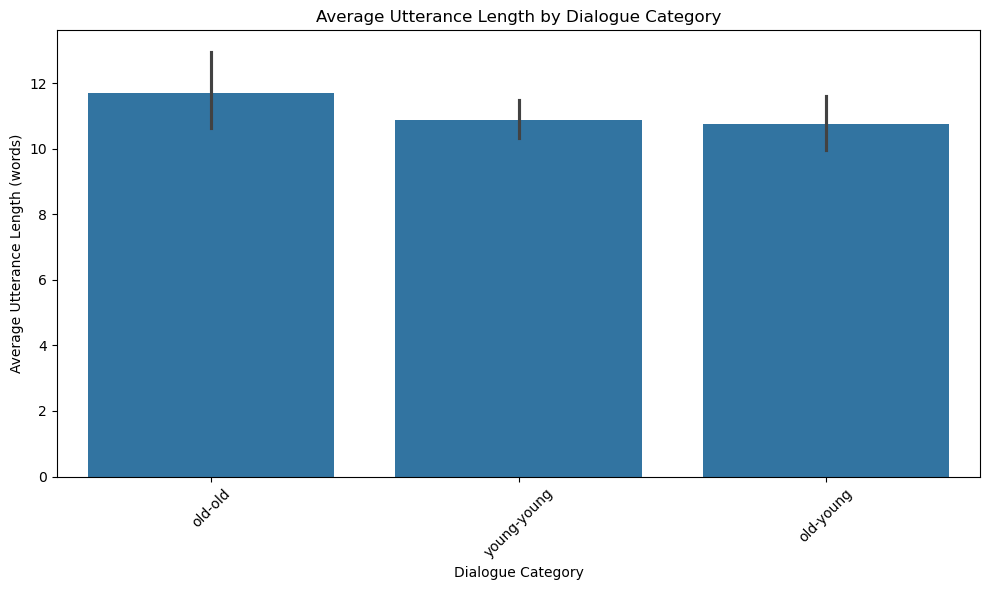

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=data_speaker_df,
    x='dialogue_cat',
    y='avg_utt_len',
    estimator='mean'
)

plt.title('Average Utterance Length by Dialogue Category')
plt.xlabel('Dialogue Category')
plt.ylabel('Average Utterance Length (words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
utt_len_groups = [
    group['avg_utt_len'].dropna()
    for _, group in data_speaker_df.groupby('dialogue_cat')
]

f_val, p_val = f_oneway(*utt_len_groups)
print(f"ANOVA results: F = {f_val:.3f}, p = {p_val:.4f}")

ANOVA results: F = 1.096, p = 0.3351


In [113]:
data_speaker_df.columns

Index(['dialogue_id', 'who', 'avg_utt_len', 'avg_swear_count',
       'avg_filler_count', 'num_of_utts', 'utt_count_per_speaker',
       'total_words_dialogue', 'total_words_speaker', 'unique_words_dialogue',
       'unique_words_speaker', 'exactage', 'agerange', 'num_of_speakers',
       'unique_word_ratio_overall', 'unique_word_ratio_per_speaker',
       'utt_prop_per_speaker', 'age_cat', 'dialogue_cat'],
      dtype='object')

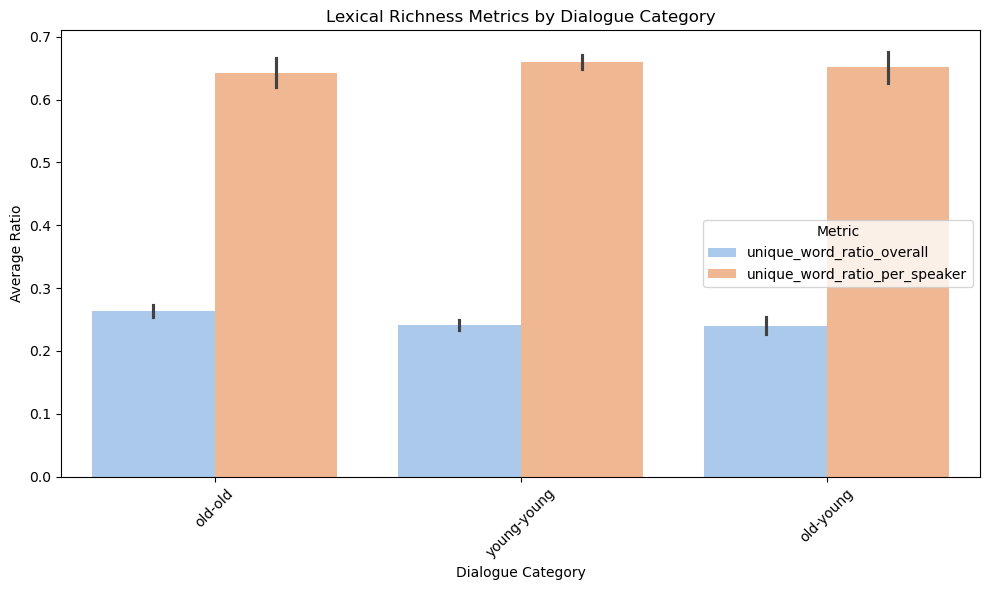

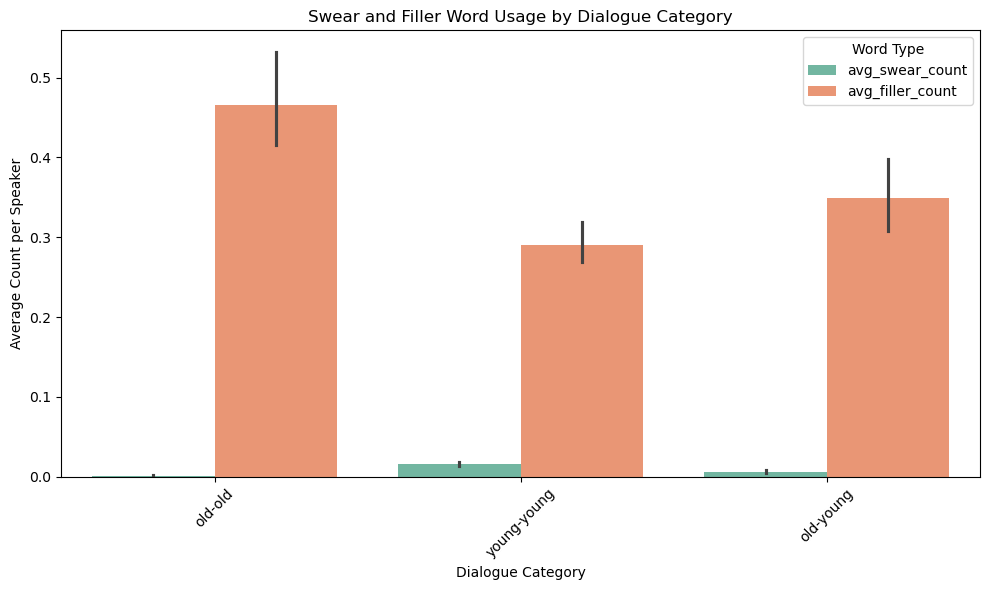

In [31]:
# Lexical richness by dialogue category
lexical_df = data_speaker_df.melt(
    id_vars='dialogue_cat',
    value_vars=['unique_word_ratio_overall', 'unique_word_ratio_per_speaker'],
    var_name='Lexical_Metric',
    value_name='Ratio'
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=lexical_df,
    x='dialogue_cat',
    y='Ratio',
    hue='Lexical_Metric',
    palette='pastel'
)
plt.title('Lexical Richness Metrics by Dialogue Category')
plt.xlabel('Dialogue Category')
plt.ylabel('Average Ratio')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

#Swear and filler word usage by dialogue category
word_type_df = data_speaker_df.melt(
    id_vars='dialogue_cat',
    value_vars=['avg_swear_count', 'avg_filler_count'],
    var_name='Word_Type',
    value_name='Average Count'
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=word_type_df,
    x='dialogue_cat',
    y='Average Count',
    hue='Word_Type',
    palette='Set2'
)
plt.title('Swear and Filler Word Usage by Dialogue Category')
plt.xlabel('Dialogue Category')
plt.ylabel('Average Count per Speaker')
plt.xticks(rotation=45)
plt.legend(title='Word Type')
plt.tight_layout()
plt.show()


In [32]:
groups_overall = [group['unique_word_ratio_overall'].dropna().values for name, group in data_speaker_df.groupby('dialogue_cat')]
groups_per_speaker = [group['unique_word_ratio_per_speaker'].dropna().values for name, group in data_speaker_df.groupby('dialogue_cat')]

# ANOVA for unique word ratios
f_overall, p_overall = f_oneway(*groups_overall)
f_speaker, p_speaker = f_oneway(*groups_per_speaker)

print(f"ANOVA for unique_word_ratio_overall: F = {f_overall:.3f}, p = {p_overall:.4f}")
print(f"ANOVA for unique_word_ratio_per_speaker: F = {f_speaker:.3f}, p = {p_speaker:.4f}")

# ANOVA for swear words
swear_groups = [group['avg_swear_count'].dropna().values for name, group in data_speaker_df.groupby('dialogue_cat')]
f_swear, p_swear = f_oneway(*swear_groups)

# ANOVA for filler words
filler_groups = [group['avg_filler_count'].dropna().values for name, group in data_speaker_df.groupby('dialogue_cat')]
f_filler, p_filler = f_oneway(*filler_groups)

print(f"ANOVA for avg_swear_count: F = {f_swear:.3f}, p = {p_swear:.4f}")
print(f"ANOVA for avg_filler_count: F = {f_filler:.3f}, p = {p_filler:.4f}")

ANOVA for unique_word_ratio_overall: F = 4.810, p = 0.0085
ANOVA for unique_word_ratio_per_speaker: F = 1.111, p = 0.3299
ANOVA for avg_swear_count: F = 47.110, p = 0.0000
ANOVA for avg_filler_count: F = 21.153, p = 0.0000


## exploring dialogue uttarances based on the above filtering criteria

### setting up utterance df 

In [33]:
dialogue_ids = data_speaker_df['dialogue_id'].unique()
df_utts_29 = pd.read_csv('df_utts_2.csv')
df_utts_29 = df_utts_29[df_utts_29['dialogue_id'].isin(dialogue_ids)]

dialogue_cat_df = data_speaker_df[['dialogue_id', 'dialogue_cat']].drop_duplicates()
df_utts_29 = pd.merge(df_utts_29, dialogue_cat_df, on='dialogue_id', how='left')

age_cat_df = data_speaker_df[['dialogue_id', 'who', 'age_cat']]
df_utts_29 = pd.merge(df_utts_29, age_cat_df, left_on=['dialogue_id', 'who'], right_on=['dialogue_id', 'who'], how='left')

# df_utts_29 = df_utts_29.drop(columns=['id'])
df_utts_29 = df_utts_29[df_utts_29['u'].notna()]

def utt_length(x):
    return len(x.split(' '))

df_utts_29['u_len'] = df_utts_29['u'].apply(lambda x : utt_length(x))
df_utts_29 = df_utts_29[~df_utts_29['who'].str.startswith('UNK', na=False)]
df_utts_29

n    who                                                  u  \
0         1  S0642                           is that music a problem?   
1         2  S0486                                no I don't think so   
2         3  S0642                                       alright then   
3         4  S0486  hi  thank you for talking to me today erm so c...   
4         5  S0642  yes this is a a recreational course at the Cre...   
...     ...    ...                                                ...   
197909  316  S0432  but  anyway  erm he was like Sha Li that's rea...   
197910  317  S0428                    no I'm quite happy with  Sha Li   
197911  318  S0432  I'll just stick with it yeah  this was like ha...   
197912  319  S0428  yeah got to change my name  that's crazy isn't...   
197913  320  S0432                        mm  yeah we probably should   

       dialogue_id dialogue_cat age_cat  u_len  
0             S29X      old-old     old      5  
1             S29X      old-old     old      5  
2             S29X      old-old     old      2  
3             S29X      old-old     old     22  
4             S29X      old-old     old    117  
...            ...          ...     ...    ...  
197909        SZYV  young-young   young     34  
197910        SZYV  young-young   young      8  
197911        SZYV  young-young   young     37  
197912        SZYV  young-young   young     15  
197913        SZYV  young-young   young      6  

[189328 rows x 7 columns]

In [111]:
df_utts_29.columns

Index(['n', 'who', 'u', 'dialogue_id', 'dialogue_cat', 'age_cat', 'u_len'], dtype='object')

### using dialign tool, extract the measures of verbal alignment

In [ ]:
# Set output directory
output_dir = "dialogue_tsvs"
os.makedirs(output_dir, exist_ok=True)

# Iterate through each dialogue
for dialogue_id, group in df_utts_29.groupby('dialogue_id'):
    # Create lines in the format: who: \t u
    lines = [f"{row['who']}:\t{row['u']}" for _, row in group.iterrows()]

    # Save to a .tsv file named with dialogue_id
    file_path = os.path.join(output_dir, f"{dialogue_id}.tsv")
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(lines))


### observing speaker independant measures

In [47]:
df_metrics_speaker_ind = pd.read_csv('output-dialign/metrics-speaker-independent.tsv',delimiter='\t')
df_metrics_speaker_ind['ID'] = df_metrics_speaker_ind['ID'].str.replace('_tsv', '', regex=False)
print(len(df_metrics_speaker_ind))
df_metrics_speaker_ind = df_metrics_speaker_ind.merge(data_speaker_df[['dialogue_id', 'dialogue_cat','avg_swear_count','avg_filler_count','unique_word_ratio_overall']].drop_duplicates(), 
                             left_on='ID', 
                             right_on='dialogue_id', 
                             how='left')

df_metrics_speaker_ind.drop(columns=['dialogue_id'], inplace=True)
df_metrics_speaker_ind

274


ID  Num. utterances  Num. tokens  Expression Lexicon Size (ELS)  \
0    S29X            327.0       2598.0                          284.0   
1    S29X            327.0       2598.0                          284.0   
2    S2AJ            314.0       3883.0                          460.0   
3    S2AJ            314.0       3883.0                          460.0   
4    S2C9           1784.0      23467.0                         2797.0   
..    ...              ...          ...                            ...   
543  SZT4            400.0       3465.0                          373.0   
544  SZXQ            782.0       6285.0                          648.0   
545  SZXQ            782.0       6285.0                          648.0   
546  SZYV            305.0       3762.0                          478.0   
547  SZYV            305.0       3762.0                          478.0   

     Expression Variety (EV)  Expression Repetition (ER)  Voc. Overlap  \
0                   0.109315                    0.526174      0.299331   
1                   0.109315                    0.526174      0.299331   
2                   0.118465                    0.600567      0.346549   
3                   0.118465                    0.600567      0.346549   
4                   0.119189                    0.685644      0.379639   
..                       ...                         ...           ...   
543                 0.107648                    0.547475      0.279221   
544                 0.103103                    0.555449      0.286555   
545                 0.103103                    0.555449      0.286555   
546                 0.127060                    0.570175      0.354294   
547                 0.127060                    0.570175      0.354294   

         ENTR         L  LMAX dialogue_cat  avg_swear_count  avg_filler_count  \
0    0.931965  1.271605   4.0      old-old         0.000000          0.296296   
1    0.931965  1.271605   4.0      old-old         0.000000          0.230303   
2    1.278340  1.448748   5.0  young-young         0.019481          0.214286   
3    1.278340  1.448748   5.0  young-young         0.050000          0.312500   
4    1.542350  1.743697   6.0  young-young         0.015642          0.279330   
..        ...       ...   ...          ...              ...               ...   
543  0.978906  1.305541   4.0      old-old         0.000000          0.227273   
544  1.078631  1.355444   5.0  young-young         0.000000          0.692308   
545  1.078631  1.355444   5.0  young-young         0.000000          0.375000   
546  1.242661  1.455970   4.0  young-young         0.000000          0.253247   
547  1.242661  1.455970   4.0  young-young         0.000000          0.450331   

     unique_word_ratio_overall  
0                     0.298077  
1                     0.321277  
2                     0.266085  
3                     0.231505  
4                     0.109257  
..                         ...  
543                   0.324444  
544                   0.217766  
545                   0.294944  
546                   0.274763  
547                   0.227639  

[548 rows x 14 columns]

In [48]:
#summary statistics
df_metrics_speaker_ind.describe()


Num. utterances   Num. tokens  Expression Lexicon Size (ELS)  \
count       548.000000    548.000000                     548.000000   
mean        690.978102   7254.489051                     807.653285   
std         529.056046   5078.919213                     585.717667   
min          60.000000    766.000000                      82.000000   
25%         327.000000   3524.000000                     373.000000   
50%         532.000000   5507.500000                     613.500000   
75%         921.000000  10153.000000                    1080.000000   
max        4118.000000  36964.000000                    4235.000000   

       Expression Variety (EV)  Expression Repetition (ER)  Voc. Overlap  \
count               548.000000                  548.000000    548.000000   
mean                  0.111060                    0.585111      0.323225   
std                   0.013575                    0.064409      0.042531   
min                   0.026496                    0.277472      0.086667   
25%                   0.106449                    0.557269      0.299678   
50%                   0.113461                    0.593255      0.327483   
75%                   0.119155                    0.633551      0.354463   
max                   0.134757                    0.703544      0.410274   

             ENTR           L        LMAX  avg_swear_count  avg_filler_count  \
count  548.000000  548.000000  548.000000       548.000000        548.000000   
mean     1.181708    1.425906    5.715328         0.010684          0.342493   
std      0.194557    0.126670    1.290941         0.016872          0.276185   
min      0.539887    1.135447    3.000000         0.000000          0.036364   
25%      1.072945    1.344793    5.000000         0.000000          0.211899   
50%      1.196737    1.418806    6.000000         0.003268          0.283556   
75%      1.317936    1.512128    6.000000         0.015881          0.404579   
max      1.669930    1.767958   11.000000         0.121094          3.846154   

       unique_word_ratio_overall  
count                 548.000000  
mean                    0.246314  
std                     0.074436  
min                     0.096032  
25%                     0.191136  
50%                     0.234996  
75%                     0.286885  
max                     0.514825

In [49]:
numeric_cols = df_metrics_speaker_ind.select_dtypes(include='number').columns
summary_stats = df_metrics_speaker_ind.groupby('dialogue_cat')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
display(summary_stats)

Num. utterances                             Num. tokens  \
                        mean         std    min     max         mean   
dialogue_cat                                                           
old-old           474.710145  226.424129  115.0  1098.0  5346.246377   
old-young         668.648649  366.030631  148.0  1526.0  7157.621622   
young-young       784.720238  615.368594   60.0  4118.0  8059.565476   

                                           Expression Lexicon Size (ELS)  \
                      std     min      max                          mean   
dialogue_cat                                                               
old-old       2798.719443  1558.0  12884.0                    546.347826   
old-young     3908.203009  1941.0  17284.0                    774.135135   
young-young   5782.373502   766.0  36964.0                    922.357143   

                          ... avg_swear_count           avg_filler_count  \
                     std  ...             min       max             mean   
dialogue_cat              ...                                              
old-old       283.335391  ...             0.0  0.044025         0.465652   
old-young     422.384176  ...             0.0  0.051163         0.349007   
young-young   668.498056  ...             0.0  0.121094         0.290475   

                                           unique_word_ratio_overall  \
                   std       min       max                      mean   
dialogue_cat                                                           
old-old       0.360508  0.102326  3.606557                  0.263182   
old-young     0.197879  0.037975  1.202703                  0.239646   
young-young   0.232153  0.036364  3.846154                  0.240855   

                                            
                   std       min       max  
dialogue_cat                                
old-old       0.061831  0.122360  0.408163  
old-young     0.056832  0.141143  0.403010  
young-young   0.081381  0.096032  0.514825  

[3 rows x 48 columns]

In [52]:
df_metrics_speaker_ind.columns

Index(['ID', 'Num. utterances', 'Num. tokens', 'Expression Lexicon Size (ELS)',
       'Expression Variety (EV)', 'Expression Repetition (ER)', 'Voc. Overlap',
       'ENTR', 'L', 'LMAX', 'dialogue_cat', 'avg_swear_count',
       'avg_filler_count', 'unique_word_ratio_overall'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


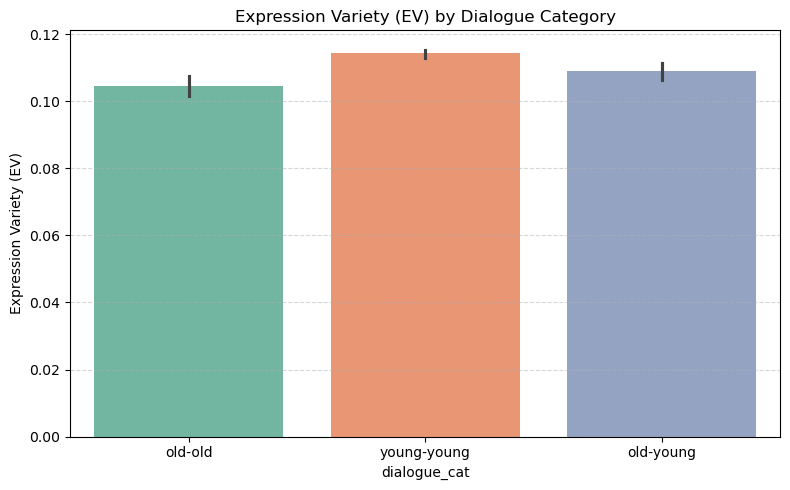

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


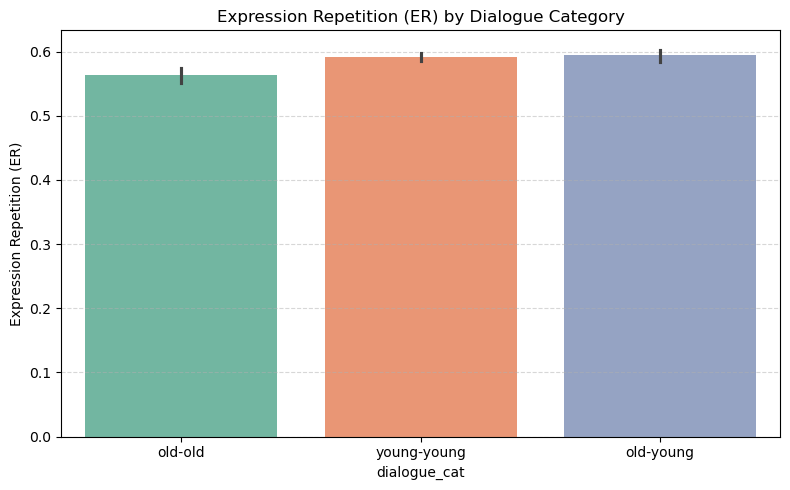

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


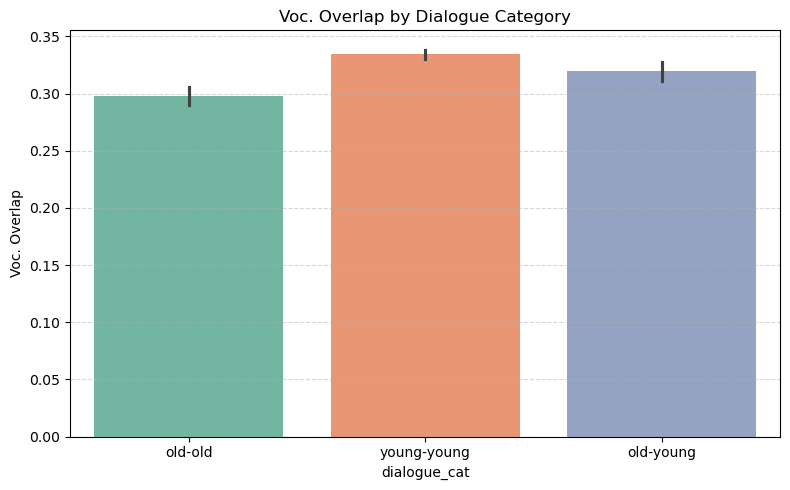

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


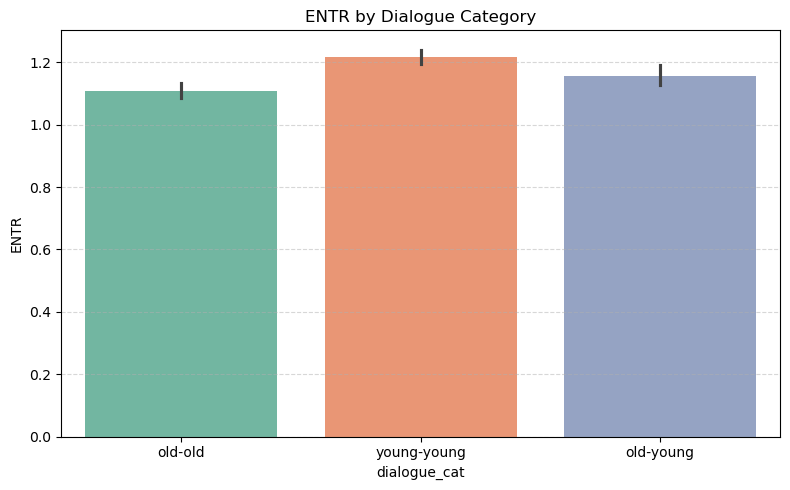

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


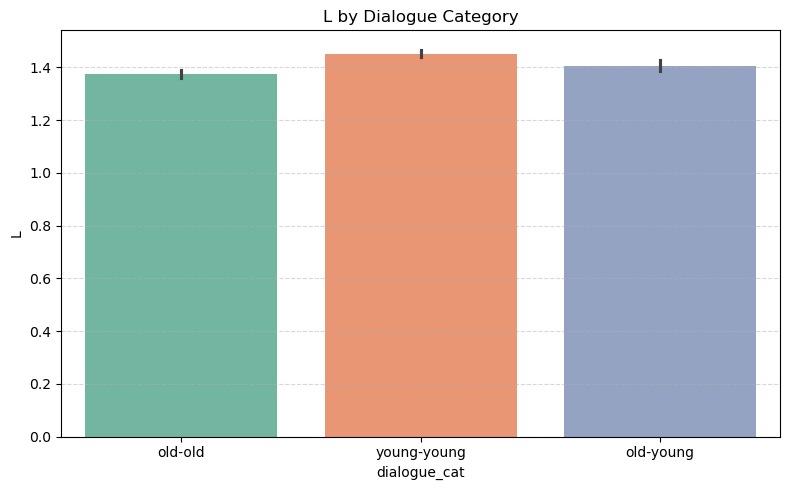

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


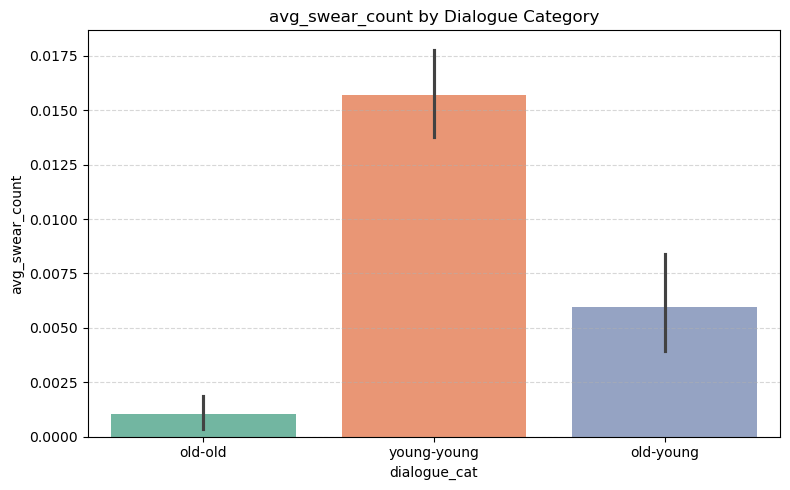

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


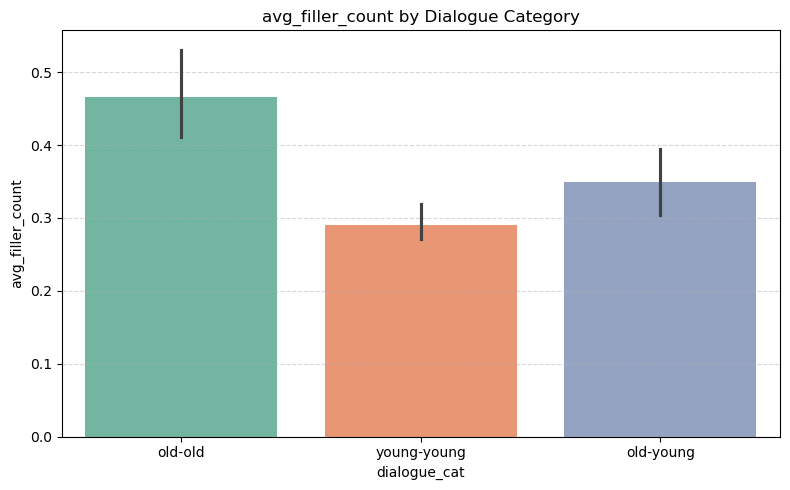

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1052432004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')


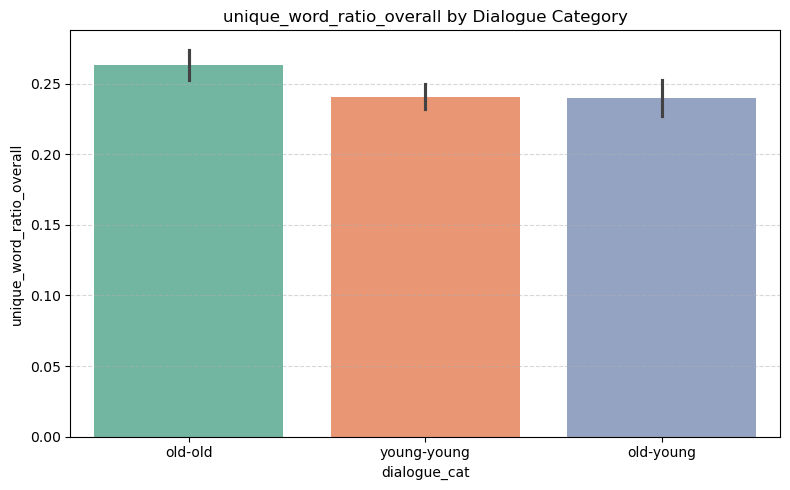

ANOVA for Expression Variety (EV): F = 28.768, p = 0.0000
ANOVA for Expression Repetition (ER): F = 11.298, p = 0.0000
ANOVA for Voc. Overlap: F = 43.139, p = 0.0000
ANOVA for ENTR: F = 16.996, p = 0.0000
ANOVA for L: F = 21.024, p = 0.0000
ANOVA for avg_swear_count: F = 47.110, p = 0.0000
ANOVA for avg_filler_count: F = 21.153, p = 0.0000
ANOVA for unique_word_ratio_overall: F = 4.810, p = 0.0085


In [63]:
features = ['Expression Variety (EV)', 'Expression Repetition (ER)', 
            'Voc. Overlap', 'ENTR', 'L','avg_swear_count','avg_filler_count','unique_word_ratio_overall']

for feat in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_metrics_speaker_ind, x='dialogue_cat', y=feat, palette='Set2')
    plt.title(f'{feat} by Dialogue Category')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

for feat in features:
    groups = [group[feat].dropna() for name, group in df_metrics_speaker_ind.groupby('dialogue_cat')]
    f_val, p_val = f_oneway(*groups)
    print(f"ANOVA for {feat}: F = {f_val:.3f}, p = {p_val:.4f}")

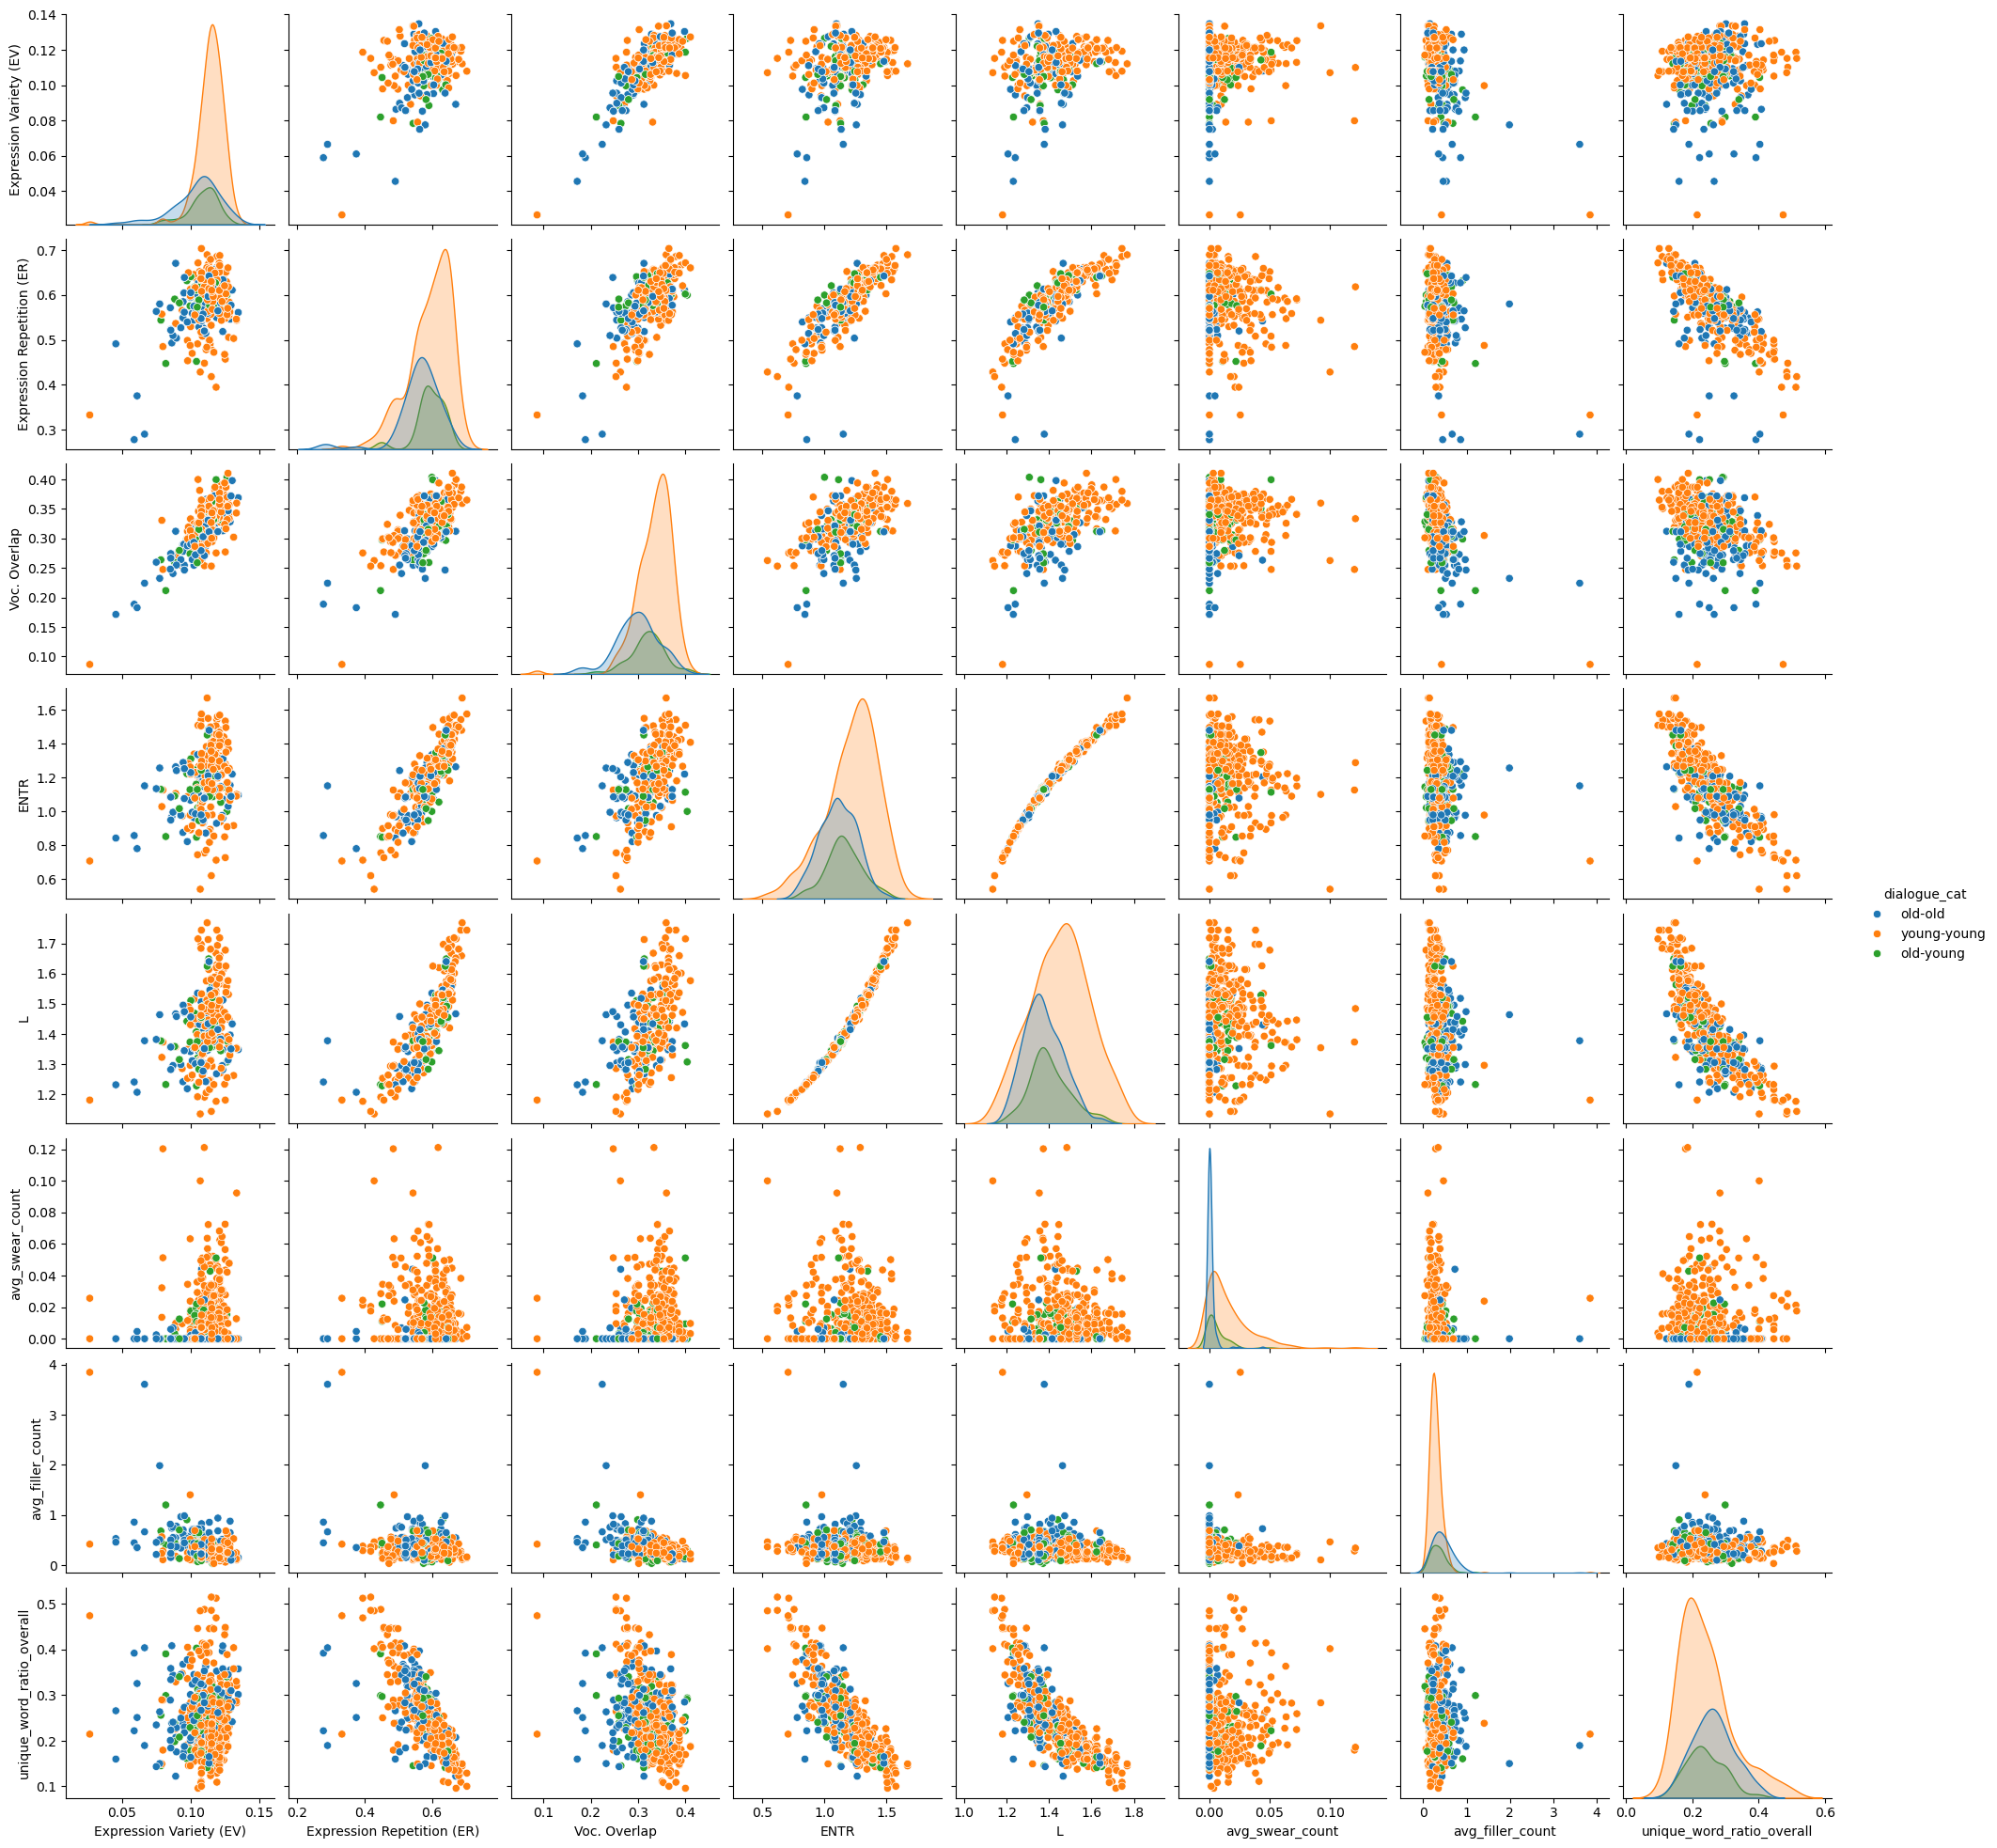

In [51]:
features = ['Expression Variety (EV)', 'Expression Repetition (ER)', 
            'Voc. Overlap', 'ENTR', 'L','avg_swear_count','avg_filler_count','unique_word_ratio_overall']
sns.pairplot(df_metrics_speaker_ind, vars=features, hue='dialogue_cat')
plt.show()

In [55]:
df_metrics_speaker_dep = pd.read_csv('output-dialign/metrics-speaker-dependent.tsv',delimiter='\t')
df_metrics_speaker_dep

ID     S1     S2  S1/Initiated Expression (IE_S1)  \
0    S29X_tsv  S0486  S0642                         0.450704   
1    S2AJ_tsv  S0439  S0441                         0.508696   
2    S2C9_tsv  S0336  S0362                         0.558455   
3    S2CY_tsv  S0679  S0680                         0.412500   
4    S2FT_tsv  S0058  S0179                         0.475472   
..        ...    ...    ...                              ...   
269  SZPS_tsv  S0058  S0179                         0.539273   
270  SZQX_tsv  S0439  S0450                         0.490473   
271  SZT4_tsv  S0486  S0528                         0.525469   
272  SZXQ_tsv  S0058  S0120                         0.632716   
273  SZYV_tsv  S0428  S0432                         0.368201   

     S1/Expression Repetition (ER_S1)  S1/tokens (%)  \
0                            0.590638       0.452271   
1                            0.589181       0.480814   
2                            0.670305       0.562236   
3                            0.597500       0.314837   
4                            0.545089       0.656981   
..                                ...            ...   
269                          0.613901       0.581902   
270                          0.674790       0.425136   
271                          0.559322       0.544877   
272                          0.513356       0.655211   
273                          0.653564       0.398990   

     S2/Initiated Expression (IE_S2)  S2/Expression Repetition (ER_S2)  \
0                           0.549296                          0.472944   
1                           0.491304                          0.611111   
2                           0.441545                          0.705344   
3                           0.587500                          0.526709   
4                           0.524528                          0.499450   
..                               ...                               ...   
269                         0.460727                          0.605953   
270                         0.509527                          0.724809   
271                         0.474531                          0.533291   
272                         0.367284                          0.635441   
273                         0.631799                          0.514816   

     S2/tokens (%)  Voc. Overlap S1  ...  SR/S1/ER  SR/S1/ENTR   SR/S1/L  \
0         0.547729         0.554180  ...  0.720896    1.083668  1.360119   
1         0.519186         0.497890  ...  0.773557    1.227170  1.425926   
2         0.437764         0.521866  ...  0.882411    1.730264  1.902831   
3         0.685163         0.570909  ...  0.647679    0.944028  1.274678   
4         0.343019         0.372141  ...  0.762466    1.312922  1.481760   
..             ...              ...  ...       ...         ...       ...   
269       0.418098         0.432464  ...  0.813135    1.491262  1.630938   
270       0.574864         0.550118  ...  0.821392    1.689655  1.822621   
271       0.455123         0.452632  ...  0.746884    1.184078  1.422967   
272       0.344789         0.378889  ...  0.782483    1.335964  1.506723   
273       0.601010         0.589286  ...  0.749395    1.204087  1.422680   

     SR/S1/LMAX  SR/S2/ELS  SR/S2/EV  SR/S2/ER  SR/S2/ENTR   SR/S2/L  \
0           4.0      250.0  0.157729  0.709779    1.099993  1.361596   
1           5.0      376.0  0.173272  0.796774    1.686916  1.748332   
2           8.0     1973.0  0.176665  0.857181    1.576889  1.774691   
3           4.0      346.0  0.183166  0.793012    1.414652  1.546571   
4           9.0      165.0  0.158960  0.659923    0.922680  1.276062   
..          ...        ...       ...       ...         ...       ...   
269         7.0      550.0  0.161007  0.763466    1.349140  1.511758   
270         7.0     2634.0  0.171228  0.859910    1.808902  1.990274   
271         5.0      290.0  0.163013  0.707139    1.140621  1.372973   
272         9.0      373.0  0.145874  0.689480 

### It is indended to address the problem - How well cross generational dialogues align with youth-like or old-like conversations??

### Approach :

- train a binary classification classification model with young-young and old-old
   - dataset is imbalaced, but undersampling will make more information loss
   - trying evaluation metrices like balanced accuracy --> 
- then separately use the class young - old to see the generation dominance considering the dialodue as a single unit

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, balanced_accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics

In [ ]:
# Average filler and swear counts per dialogue
df_avg_dialogue = df_metrics_speaker_ind.groupby('ID').agg({
    'avg_filler_count': 'mean',
    'avg_swear_count': 'mean'
}).reset_index()

dialogue_features = df_metrics_speaker_ind.drop_duplicates(subset='ID')[
    ['ID', 'dialogue_cat', 'unique_word_ratio_overall', 'Expression Variety (EV)', 
     'Expression Repetition (ER)', 'Voc. Overlap', 'ENTR', 'L']
]

df_dialogue_level = pd.merge(df_avg_dialogue, dialogue_features, on='ID', how='left')


In [68]:
#preparing dataset

cross_gen = ['old-young']
cross_gen_df = df_dialogue_level[df_dialogue_level['dialogue_cat'].isin(cross_gen)]
#print(len(cross_gen_df))

data_df = df_dialogue_level[~df_dialogue_level['dialogue_cat'].isin(cross_gen)]
print(data_df['dialogue_cat'].value_counts())
data_df.head(2)

dialogue_cat
young-young    168
old-old         69
Name: count, dtype: int64


ID  avg_filler_count  avg_swear_count dialogue_cat  \
0  S29X          0.263300          0.00000      old-old   
1  S2AJ          0.263393          0.03474  young-young   

   unique_word_ratio_overall  Expression Variety (EV)  \
0                   0.298077                 0.109315   
1                   0.266085                 0.118465   

   Expression Repetition (ER)  Voc. Overlap      ENTR         L  
0                    0.526174      0.299331  0.931965  1.271605  
1                    0.600567      0.346549  1.278340  1.448748

In [70]:
features

['Expression Variety (EV)',
 'Expression Repetition (ER)',
 'Voc. Overlap',
 'ENTR',
 'L',
 'avg_swear_count',
 'avg_filler_count',
 'unique_word_ratio_overall']

Average Precision: 0.6946
Average Recall: 0.8818
Average F1 Score: 0.7745
Average Balanced Accuracy: 0.8486


C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1932361220.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Set2')


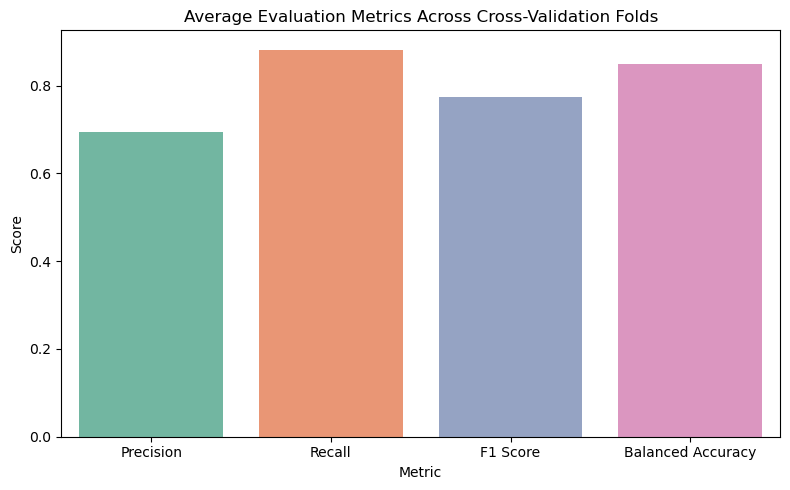

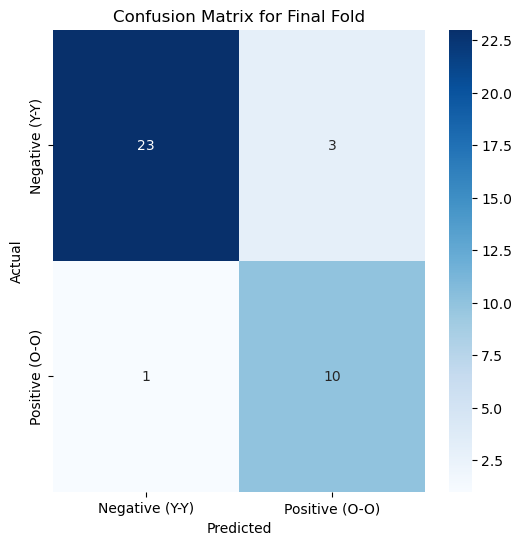

In [ ]:
# Split only the Y-Y and O-O data

X = data_df[features] 
y = data_df['dialogue_cat'].map({'young-young': 0, 'old-old': 1})  # for binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# cross vlaidate 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

precision_scores = []
recall_scores = []
f1_scores = []
balanced_acc_scores = []
confusion_matrices = []

# Cross-validation loop
for train_index, test_index in cv.split(X_train, y_train):
    X_train_v, X_test_v = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_v, y_test_v = y_train.iloc[train_index], y_train.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train_v)
    X_test_scaled = scaler.transform(X_test_v)

    log_reg.fit(X_train_scaled, y_train_v)

    y_pred = log_reg.predict(X_test_scaled)

    precision_scores.append(precision_score(y_test_v, y_pred, average='binary', pos_label=1))
    recall_scores.append(recall_score(y_test_v, y_pred, average='binary', pos_label=1))
    f1_scores.append(f1_score(y_test_v, y_pred, average='binary'))
    balanced_acc_scores.append(balanced_accuracy_score(y_test_v, y_pred))
    confusion_matrices.append(confusion_matrix(y_test_v, y_pred))

# Calculate the average of each metric across the folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_balanced_acc = np.mean(balanced_acc_scores)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average Balanced Accuracy: {avg_balanced_acc:.4f}")

metrics = ['Precision', 'Recall', 'F1 Score', 'Balanced Accuracy']
values = [avg_precision, avg_recall, avg_f1, avg_balanced_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='Set2')
plt.title('Average Evaluation Metrics Across Cross-Validation Folds')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Plot a sample confusion matrix (from the last fold, for example)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (Y-Y)', 'Positive (O-O)'], yticklabels=['Negative (Y-Y)', 'Positive (O-O)'])
plt.title('Confusion Matrix for Final Fold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### prediction of final test data and cross gen data

Test Precision: 0.4000
Test Recall: 0.8000
Test F1 Score: 0.5333
Test Balanced Accuracy: 0.7421


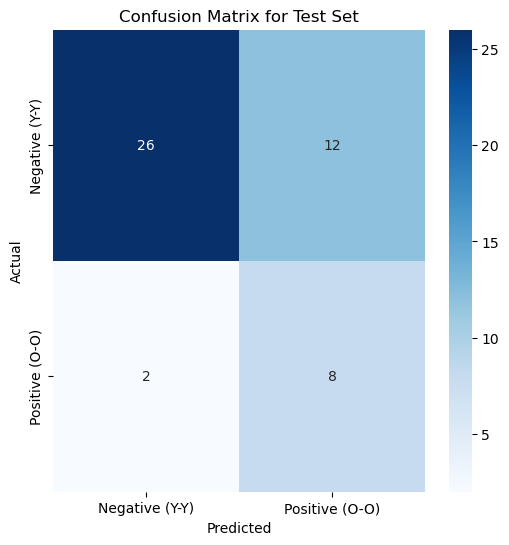

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)
#testing on test set
y_test_pred = log_reg.predict(X_test_scaled)


test_precision = precision_score(y_test, y_test_pred, average='binary', pos_label=1)
test_recall = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, average='binary')
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_acc:.4f}")

plt.figure(figsize=(6,6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (Y-Y)', 'Positive (O-O)'], yticklabels=['Negative (Y-Y)', 'Positive (O-O)'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1923558517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cross_gen_predictions, x='Predicted Class', palette='Set2')


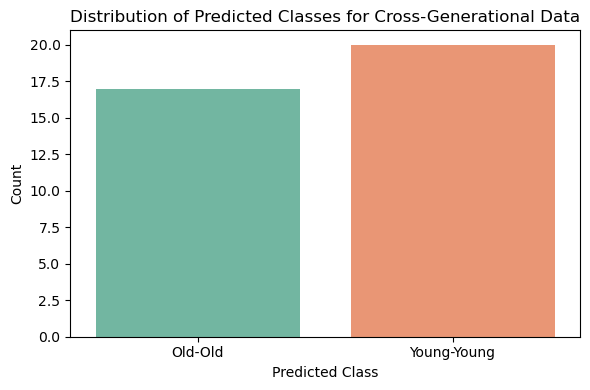

Predicted Class
Young-Young    20
Old-Old        17
Name: count, dtype: int64


In [ ]:
#cross generation data
X_cross_gen = cross_gen_df[features] 
X_cross_gen_scaled = scaler.transform(X_cross_gen) 

#testing with cross gen dataset
y_test_pred_cross_gen = log_reg.predict(X_cross_gen_scaled)

cross_gen_predictions = pd.DataFrame({'Predicted Class': y_test_pred_cross_gen})
cross_gen_predictions['Predicted Class'] = cross_gen_predictions['Predicted Class'].map({0: 'Young-Young', 1: 'Old-Old'})

# Plotting the distribution of predicted classes for the cross-generational data
plt.figure(figsize=(6, 4))
sns.countplot(data=cross_gen_predictions, x='Predicted Class', palette='Set2')
plt.title('Distribution of Predicted Classes for Cross-Generational Data')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(cross_gen_predictions['Predicted Class'].value_counts())

#### shap analysis

In [86]:
%pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   -------- ------------------------------- 112.6/545.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  542.7/545.2 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [87]:
import shap

c:\Users\USER\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


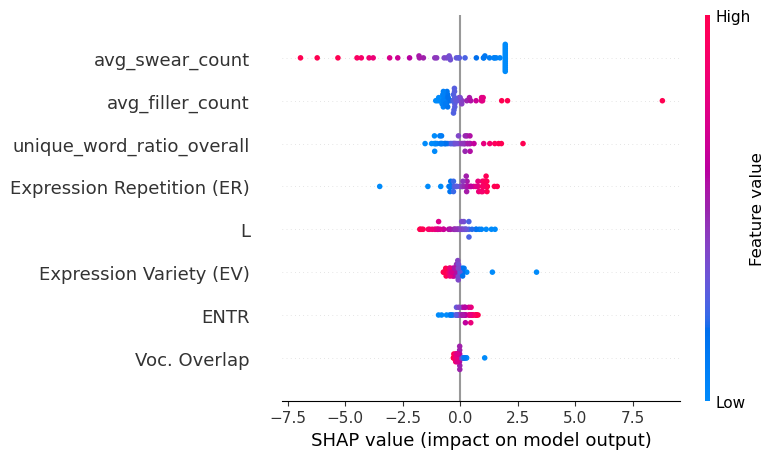

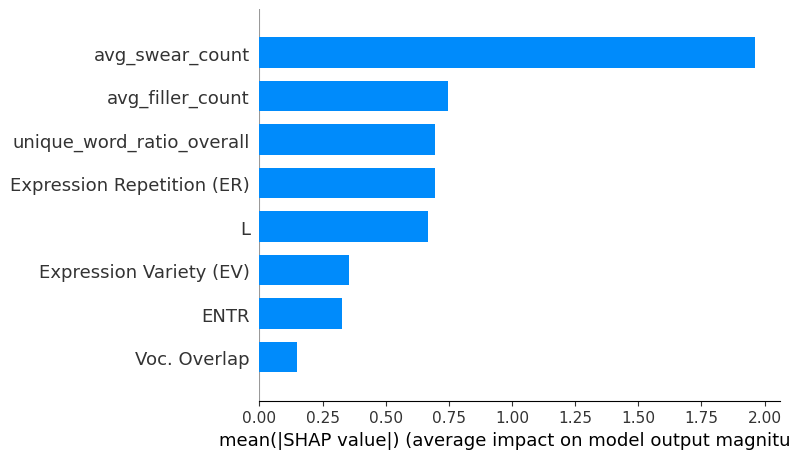

In [113]:
def shap_explainer(explainer):  
    shap_values = explainer.shap_values(X_test_scaled)

    shap.summary_plot(shap_values, X_test_scaled, feature_names=features)

    shap.summary_plot(shap_values, X_test_scaled, feature_names=features, plot_type='bar')

    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled[0], feature_names=features)

explainer = shap.LinearExplainer(log_reg, X_train_scaled, feature_perturbation="interventional")
shap_explainer(explainer)

SHAP summary for O-Y instances predicted as Y-Y:


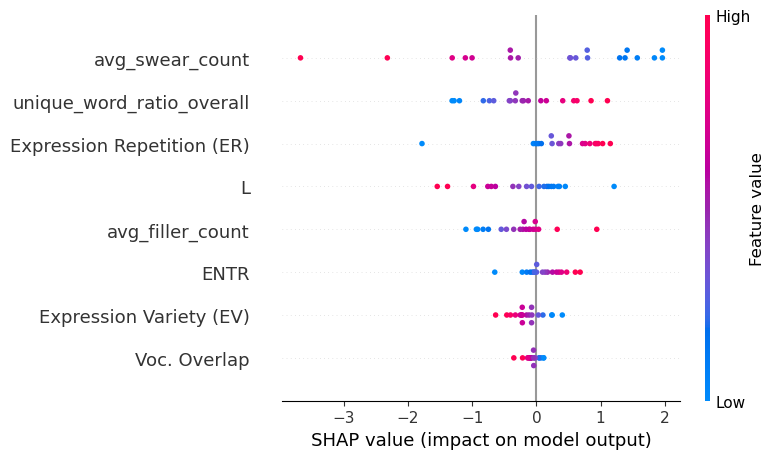

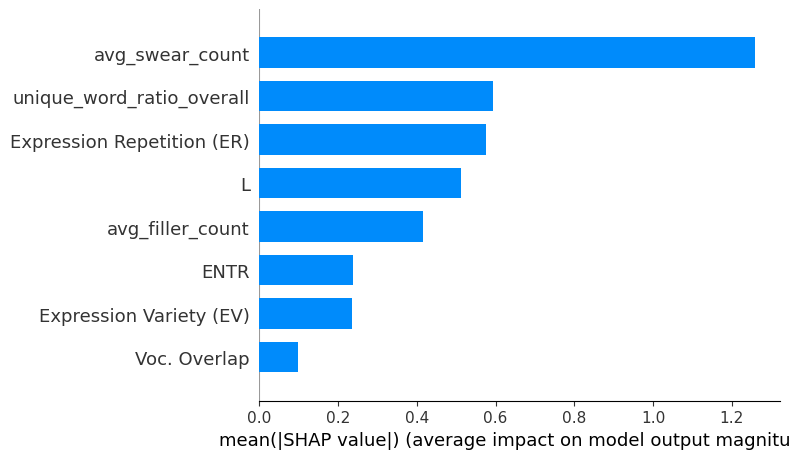

SHAP summary for O-Y instances predicted as O-O:


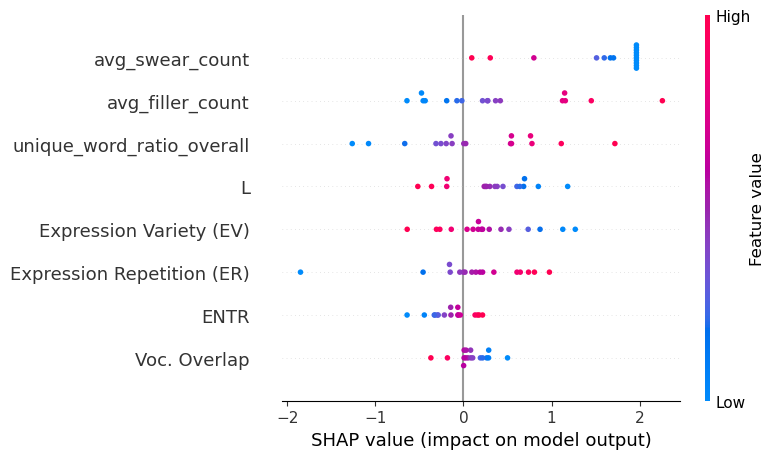

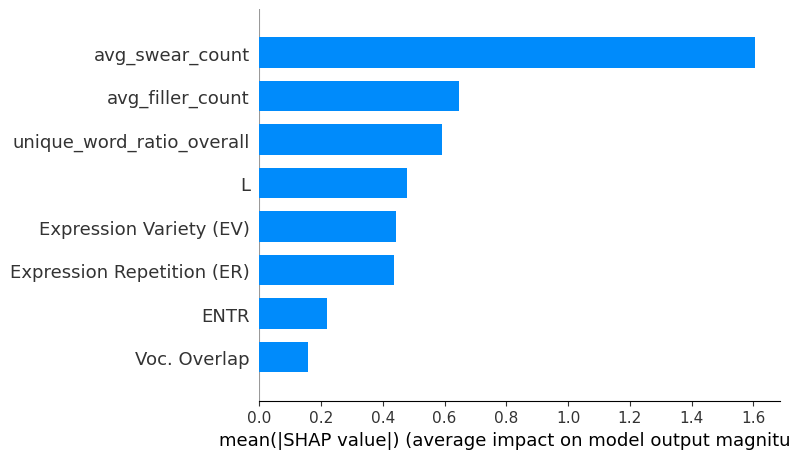

In [111]:
def shap_explainer_Y_O(explainer):    
    shap.initjs()

    yy_indices = np.where(y_test_pred_cross_gen == 0)[0] 
    oo_indices = np.where(y_test_pred_cross_gen == 1)[0] 
    shap_values_cross_gen = explainer.shap_values(X_cross_gen_scaled)
    shap_yy = shap_values_cross_gen[yy_indices] 
    shap_oo = shap_values_cross_gen[oo_indices]


    X_yy = X_cross_gen_scaled[yy_indices]
    X_oo = X_cross_gen_scaled[oo_indices]

    print("SHAP summary for O-Y instances predicted as Y-Y:")
    shap.summary_plot(shap_yy, X_yy, feature_names=features)
    shap.summary_plot(shap_yy, X_yy, feature_names=features, plot_type='bar')

    print("SHAP summary for O-Y instances predicted as O-O:")
    shap.summary_plot(shap_oo, X_oo, feature_names=features)
    shap.summary_plot(shap_oo, X_oo, feature_names=features, plot_type='bar')

shap_explainer_Y_O(explainer)


### XGBclassifier

In [101]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 682.7 kB/s eta 0:03:40
   ---------------------------------------- 0.1/150.0 MB 1.8 MB/s eta 0:01:23
   ---------------------------------------- 0.6/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.7/150.0 MB 10.7 MB/s eta 0:00:14
    --------------------------------------- 2.7/150.0 MB 13.4 MB/s eta 0:00:12
   - -------------------------------------- 4.0/150.0 MB 15.8 MB/s eta 0:00:10
   - -------------------------------------- 5.1/150.0 MB 17.1 MB/s eta 0:00:09
   - -------------------------------------- 6.3/150.0 MB 18.2 MB/s eta 0:00:08
   -- ------------------------------------- 7.5/150.0 MB 19.2 MB/s eta 0:00:08
   -- ------------------------------------- 8.6/150.0 MB 19.7 MB/s eta 0:00:08
   -- ------------------------------------- 9.5/150.0 MB 20.2 MB/s eta 0:00:07
   -- ------------------------------------- 10.6/150.0 MB 24.

In [102]:
import xgboost as xgb

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

XGBoost CV Average Precision: 0.7497
XGBoost CV Average Recall: 0.8136
XGBoost CV Average F1 Score: 0.7772
XGBoost CV Average Balanced Accuracy: 0.8414


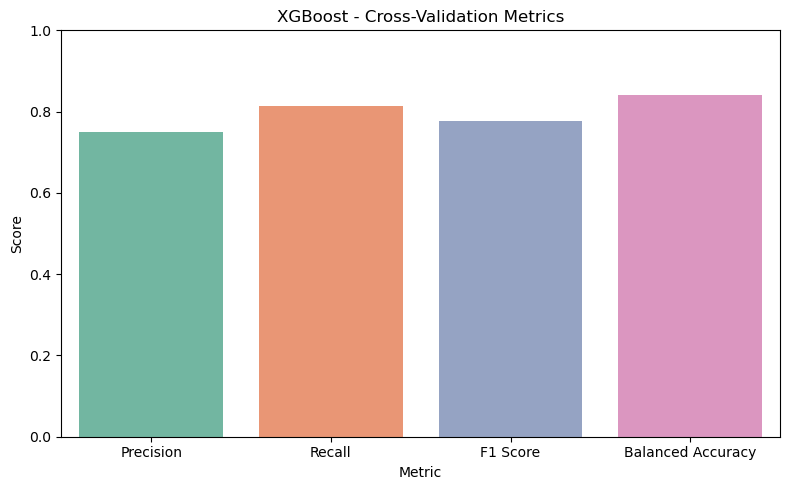

In [ ]:
precision_scores = []
recall_scores = []
f1_scores = []
balanced_acc_scores = []
confusion_matrices = []

for train_index, val_index in cv.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_val_cv_scaled = scaler.transform(X_val_cv)

    # Recalculate class imbalance for this fold
    neg, pos = np.bincount(y_train_cv)
    scale_pos_weight = neg / pos

    xgb_model_cv = xgb.XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    xgb_model_cv.fit(X_train_cv_scaled, y_train_cv)

    y_pred_val = xgb_model_cv.predict(X_val_cv_scaled)

    precision_scores.append(precision_score(y_val_cv, y_pred_val, pos_label=1))
    recall_scores.append(recall_score(y_val_cv, y_pred_val, pos_label=1))
    f1_scores.append(f1_score(y_val_cv, y_pred_val, pos_label=1))
    balanced_acc_scores.append(balanced_accuracy_score(y_val_cv, y_pred_val))
    confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_val))

avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_balanced_acc = np.mean(balanced_acc_scores)

print(f"XGBoost CV Average Precision: {avg_precision:.4f}")
print(f"XGBoost CV Average Recall: {avg_recall:.4f}")
print(f"XGBoost CV Average F1 Score: {avg_f1:.4f}")
print(f"XGBoost CV Average Balanced Accuracy: {avg_balanced_acc:.4f}")

metrics = ['Precision', 'Recall', 'F1 Score', 'Balanced Accuracy']
values = [avg_precision, avg_recall, avg_f1, avg_balanced_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='Set2')
plt.title('XGBoost - Cross-Validation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(6,6))
# sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Young-Young', 'Old-Old'], yticklabels=['Young-Young', 'Old-Old'])
# plt.title('XGBoost Confusion Matrix (Last Fold)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

### predict and evaluating test and cross gen data

Test Precision: 0.5000
Test Recall: 0.8000
Test F1 Score: 0.6154
Test Balanced Accuracy: 0.7947


c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:35:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


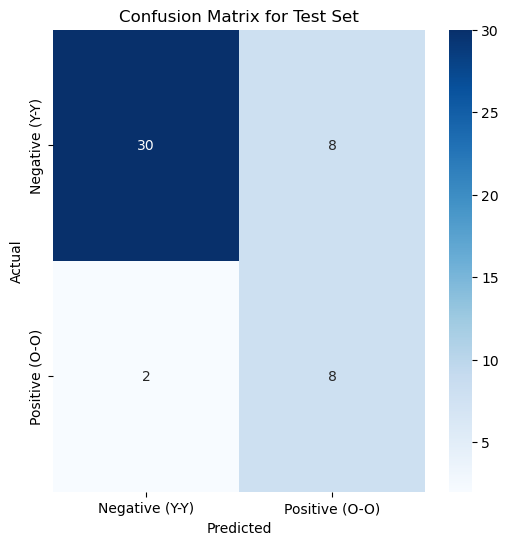

In [105]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  

# Train the model on the scaled training data
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # handle imbalance
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

y_test_pred_xgb = xgb_model.predict(X_test_scaled)


test_precision = precision_score(y_test, y_test_pred_xgb, average='binary', pos_label=1)
test_recall = recall_score(y_test, y_test_pred_xgb, average='binary', pos_label=1)
test_f1 = f1_score(y_test, y_test_pred_xgb, average='binary')
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred_xgb)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_xgb)

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_acc:.4f}")

plt.figure(figsize=(6,6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (Y-Y)', 'Positive (O-O)'], yticklabels=['Negative (Y-Y)', 'Positive (O-O)'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9396\999703099.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cross_gen_predictions_xgb, x='Predicted Class', palette='Set2')


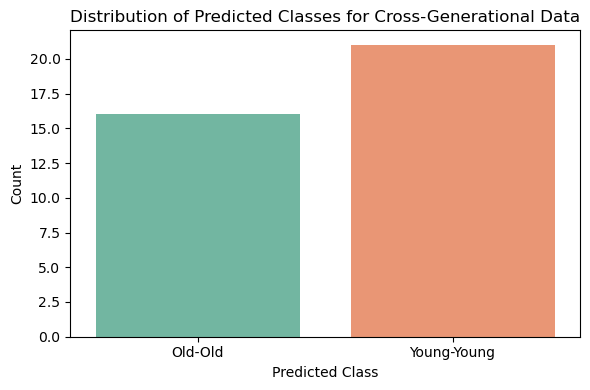

Predicted Class
Young-Young    21
Old-Old        16
Name: count, dtype: int64


In [ ]:
#cross generation data
X_cross_gen = cross_gen_df[features] 
X_cross_gen_scaled = scaler.transform(X_cross_gen) 

#testing with cross gen dataset
y_test_pred_cross_gen_xgb = xgb_model.predict(X_cross_gen_scaled)

cross_gen_predictions_xgb = pd.DataFrame({'Predicted Class': y_test_pred_cross_gen_xgb})
cross_gen_predictions_xgb['Predicted Class'] = cross_gen_predictions_xgb['Predicted Class'].map({0: 'Young-Young', 1: 'Old-Old'})

# Plotting the distribution of predicted classes for the cross-generational data
plt.figure(figsize=(6, 4))
sns.countplot(data=cross_gen_predictions_xgb, x='Predicted Class', palette='Set2')
plt.title('Distribution of Predicted Classes for Cross-Generational Data')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(cross_gen_predictions_xgb['Predicted Class'].value_counts())

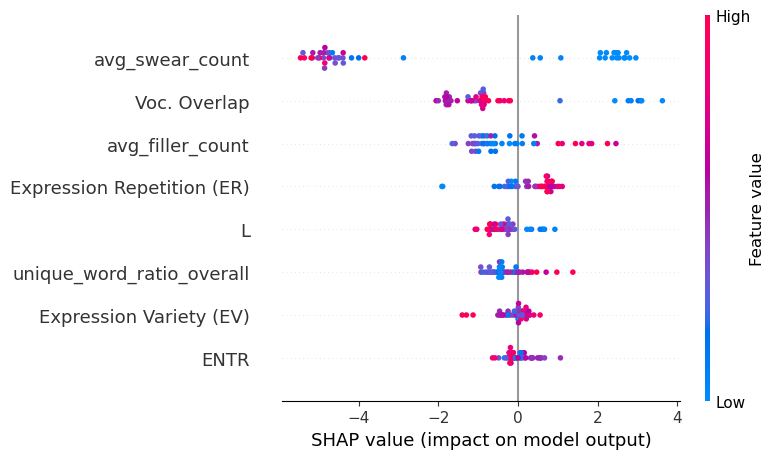

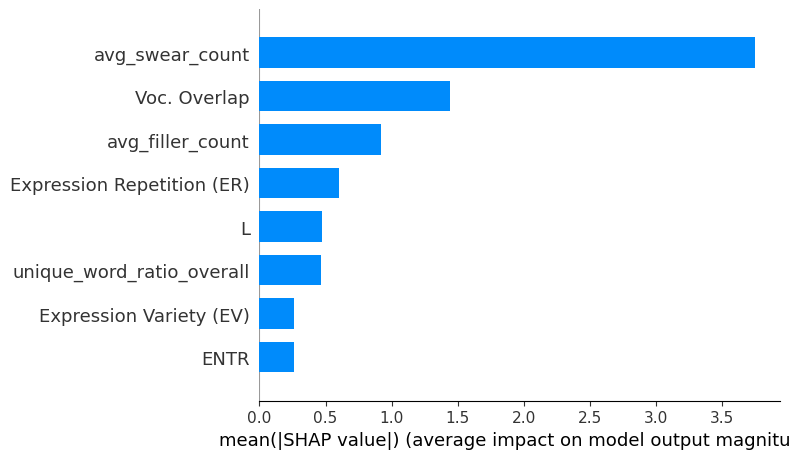

In [114]:
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_explainer(explainer_xgb)

SHAP summary for O-Y instances predicted as Y-Y:


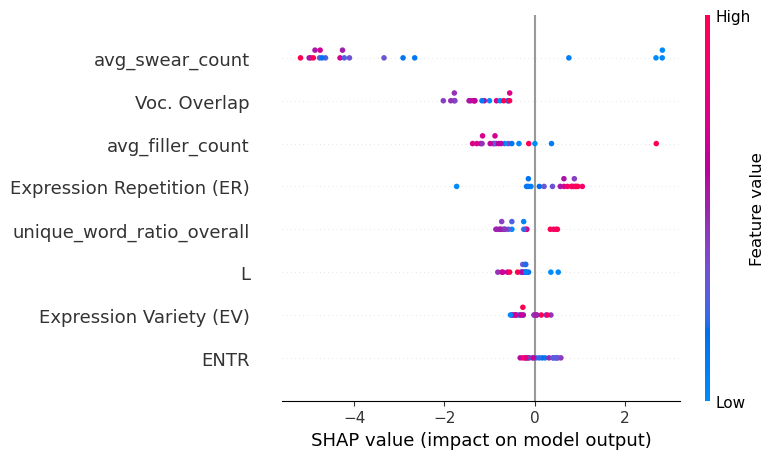

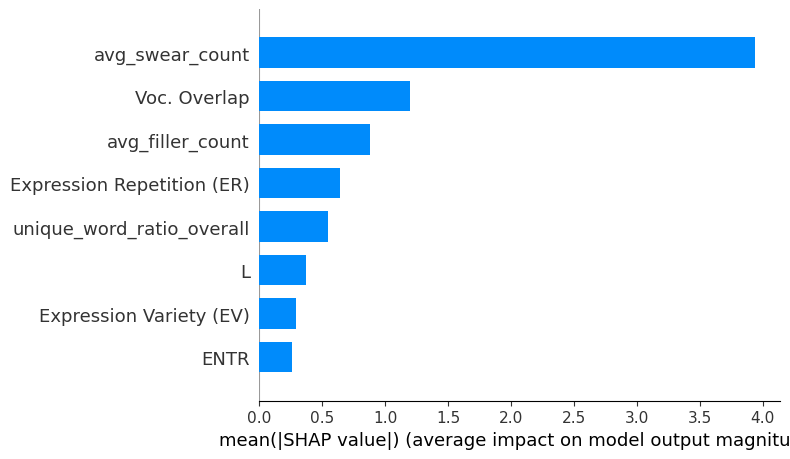

SHAP summary for O-Y instances predicted as O-O:


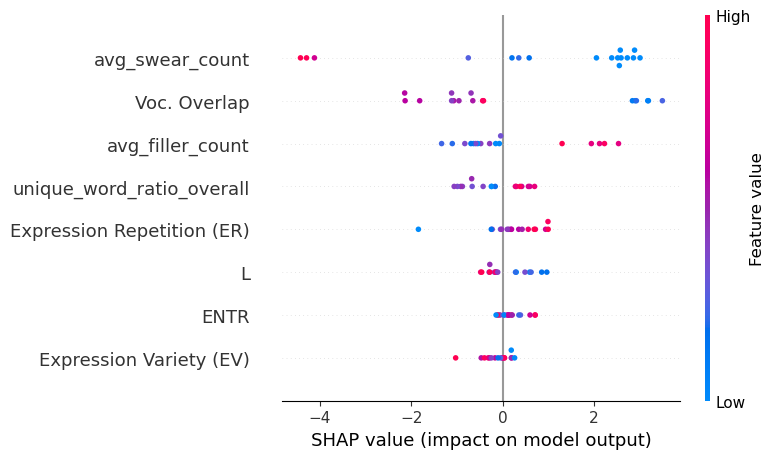

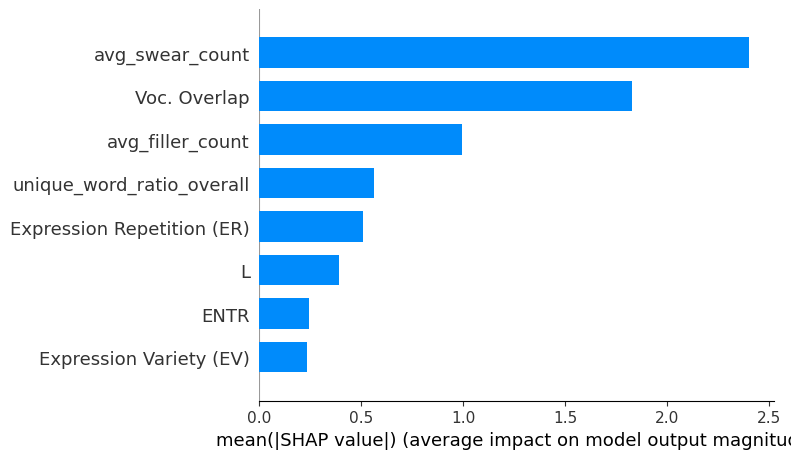

In [115]:
shap_explainer_Y_O(explainer_xgb)